This dataset captures survey responses from 843 college students aged 18–21 regarding their experiences with stress, health, relationships, academics, and emotional well-being. The responses were collected via Google Forms using a five-point Likert scale ("Not at all" to "Extremely") and anonymized to protect privacy.

🔑 Key Features (Selected):

👤 Demographic
1. Gender: Coded as 0 (Male), 1 (Female)
2. Age: Numeric age (18 to 21)

🧠 Emotional and Stress Indicators
1. Have you recently experienced stress in your life?
2. Have you noticed a rapid heartbeat or palpitations?
3. Have you been dealing with anxiety or tension recently?
4. Do you face any sleep problems or difficulties falling asleep?
5. Do you have trouble concentrating on your academic tasks?
6. Have you been feeling sadness or low mood?
7. Do you get irritated easily?
8. Do you often feel lonely or isolated?

🩺 Physical and Health Indicators
1. Have you been getting headaches more often than usual?
2. Have you been experiencing any illness or health issues?
3. Have you gained/lost weight?

📚 Academic & Environment Stressors
1. Do you feel overwhelmed with your academic workload?
2. Are you in competition with your peers, and does it affect you?
3. Do you lack confidence in your academic performance?
4. Do you lack confidence in your choice of academic subjects?
5. Academic and extracurricular activities conflicting for you?
6. Do you attend classes regularly?
7. Are you facing any difficulties with your professors or instructors?
8. Is your working environment unpleasant or stressful?
9. Is your hostel or home environment causing you difficulties?

💬 Social & Relationship Factors
1. Do you find that your relationship often causes you stress?
2. Do you struggle to find time for relaxation and leisure activities?

📌 Target Variable
1. Which type of stress do you primarily experience?: Eustress, Distress, No Stress

# Import Libraries

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from scipy.stats import (chi2_contingency, pointbiserialr,)
from scipy.stats.contingency import (association,)

import shap

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, recall_score, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder,)
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

from tabulate import tabulate

In [ ]:
sns.set_style({
  'axes.facecolor': '#f3f3f3ff',
  'figure.facecolor': '#f3f3f3ff',
})

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Preprocessing

In [ ]:
df = pd.read_csv('Stress_Dataset.csv')

In [ ]:
# Show 5 sample data
df.sample(5)

Gender  Age  Have you recently experienced stress in your life?  \
660       1   19                                                  2    
333       1   19                                                  2    
357       0   22                                                  3    
144       0   17                                                  3    
576       1   19                                                  4    

     Have you noticed a rapid heartbeat or palpitations?  \
660                                                  1     
333                                                  2     
357                                                  1     
144                                                  2     
576                                                  3     

     Have you been dealing with anxiety or tension recently?  \
660                                                  3         
333                                                  4         
357                                                  4         
144                                                  2         
576                                                  3         

     Do you face any sleep problems or difficulties falling asleep?  \
660                                                  2                
333                                                  3                
357                                                  2                
144                                                  1                
576                                                  5                

     Have you been dealing with anxiety or tension recently?.1  \
660                                                  2           
333                                                  5           
357                                                  1           
144                                                  2           
576                                                  2           

     Have you been getting headaches more often than usual?  \
660                                                  3        
333                                                  2        
357                                                  3        
144                                                  1        
576                                                  1        

     Do you get irritated easily?  \
660                             3   
333                             3   
357                             5   
144                             1   
576                             1   

     Do you have trouble concentrating on your academic tasks?  \
660                                                  4           
333                                                  2           
357                                                  4           
144                                                  2           
576                                                  2           

     Have you been feeling sadness or low mood?  \
660                                           3   
333                                           2   
357                                           2   
144                                           1   
576                                           2   

     Have you been experiencing any illness or health issues?  \
660                                                  2          
333                                                  3          
357                                                  1          
144                                                  1          
576                                                  2          

     Do you often feel lonely or isolated?  \
660                                      2   
333                                      3   
357                                      3   
144                                      1   
576                                      1   

     Do you feel overwhelmed

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [ ]:
# Define categorical columns
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Which type of stress do you primarily experience?'], dtype='object')

In [ ]:
# Define numerical columns
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

## Check duplicate data

In [ ]:
df.duplicated().sum()

np.int64(27)

There are 27 duplicate records and will be deleted.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                816 non-null    int64 
 1   Age                                                                   816 non-null    int64 
 2   Have you recently experienced stress in your life?                    816 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   816 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               816 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        816 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             816 non-null    int64 
 7   Have you been

The column "Have you been dealing with anxiety or tension recently?" has a duplicate. One of them will be deleted later after checking its collinearity with the target; the one with less collinearity will be removed.

## Check missing values

In [ ]:
# Check the unique value of each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].unique().tolist()}")

Which type of stress do you primarily experience?: ['Eustress (Positive Stress) - Stress that motivates and enhances performance.', 'No Stress - Currently experiencing minimal to no stress.', 'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.']


In [ ]:
# Check the missing value percentage of each column
for col in df.columns:
    print(f"The percentage of missing values of {col}: {df[col].isna().sum()/len(df)*100:.2f}%")

The percentage of missing values of Gender: 0.00%
The percentage of missing values of Age: 0.00%
The percentage of missing values of Have you recently experienced stress in your life?: 0.00%
The percentage of missing values of Have you noticed a rapid heartbeat or palpitations?: 0.00%
The percentage of missing values of Have you been dealing with anxiety or tension recently?: 0.00%
The percentage of missing values of Do you face any sleep problems or difficulties falling asleep?: 0.00%
The percentage of missing values of Have you been dealing with anxiety or tension recently?.1: 0.00%
The percentage of missing values of Have you been getting headaches more often than usual?: 0.00%
The percentage of missing values of Do you get irritated easily?: 0.00%
The percentage of missing values of Do you have trouble concentrating on your academic tasks?: 0.00%
The percentage of missing values of Have you been feeling sadness or low mood?: 0.00%
The percentage of missing values of Have you been e

There are no missing values.

## Check outliers

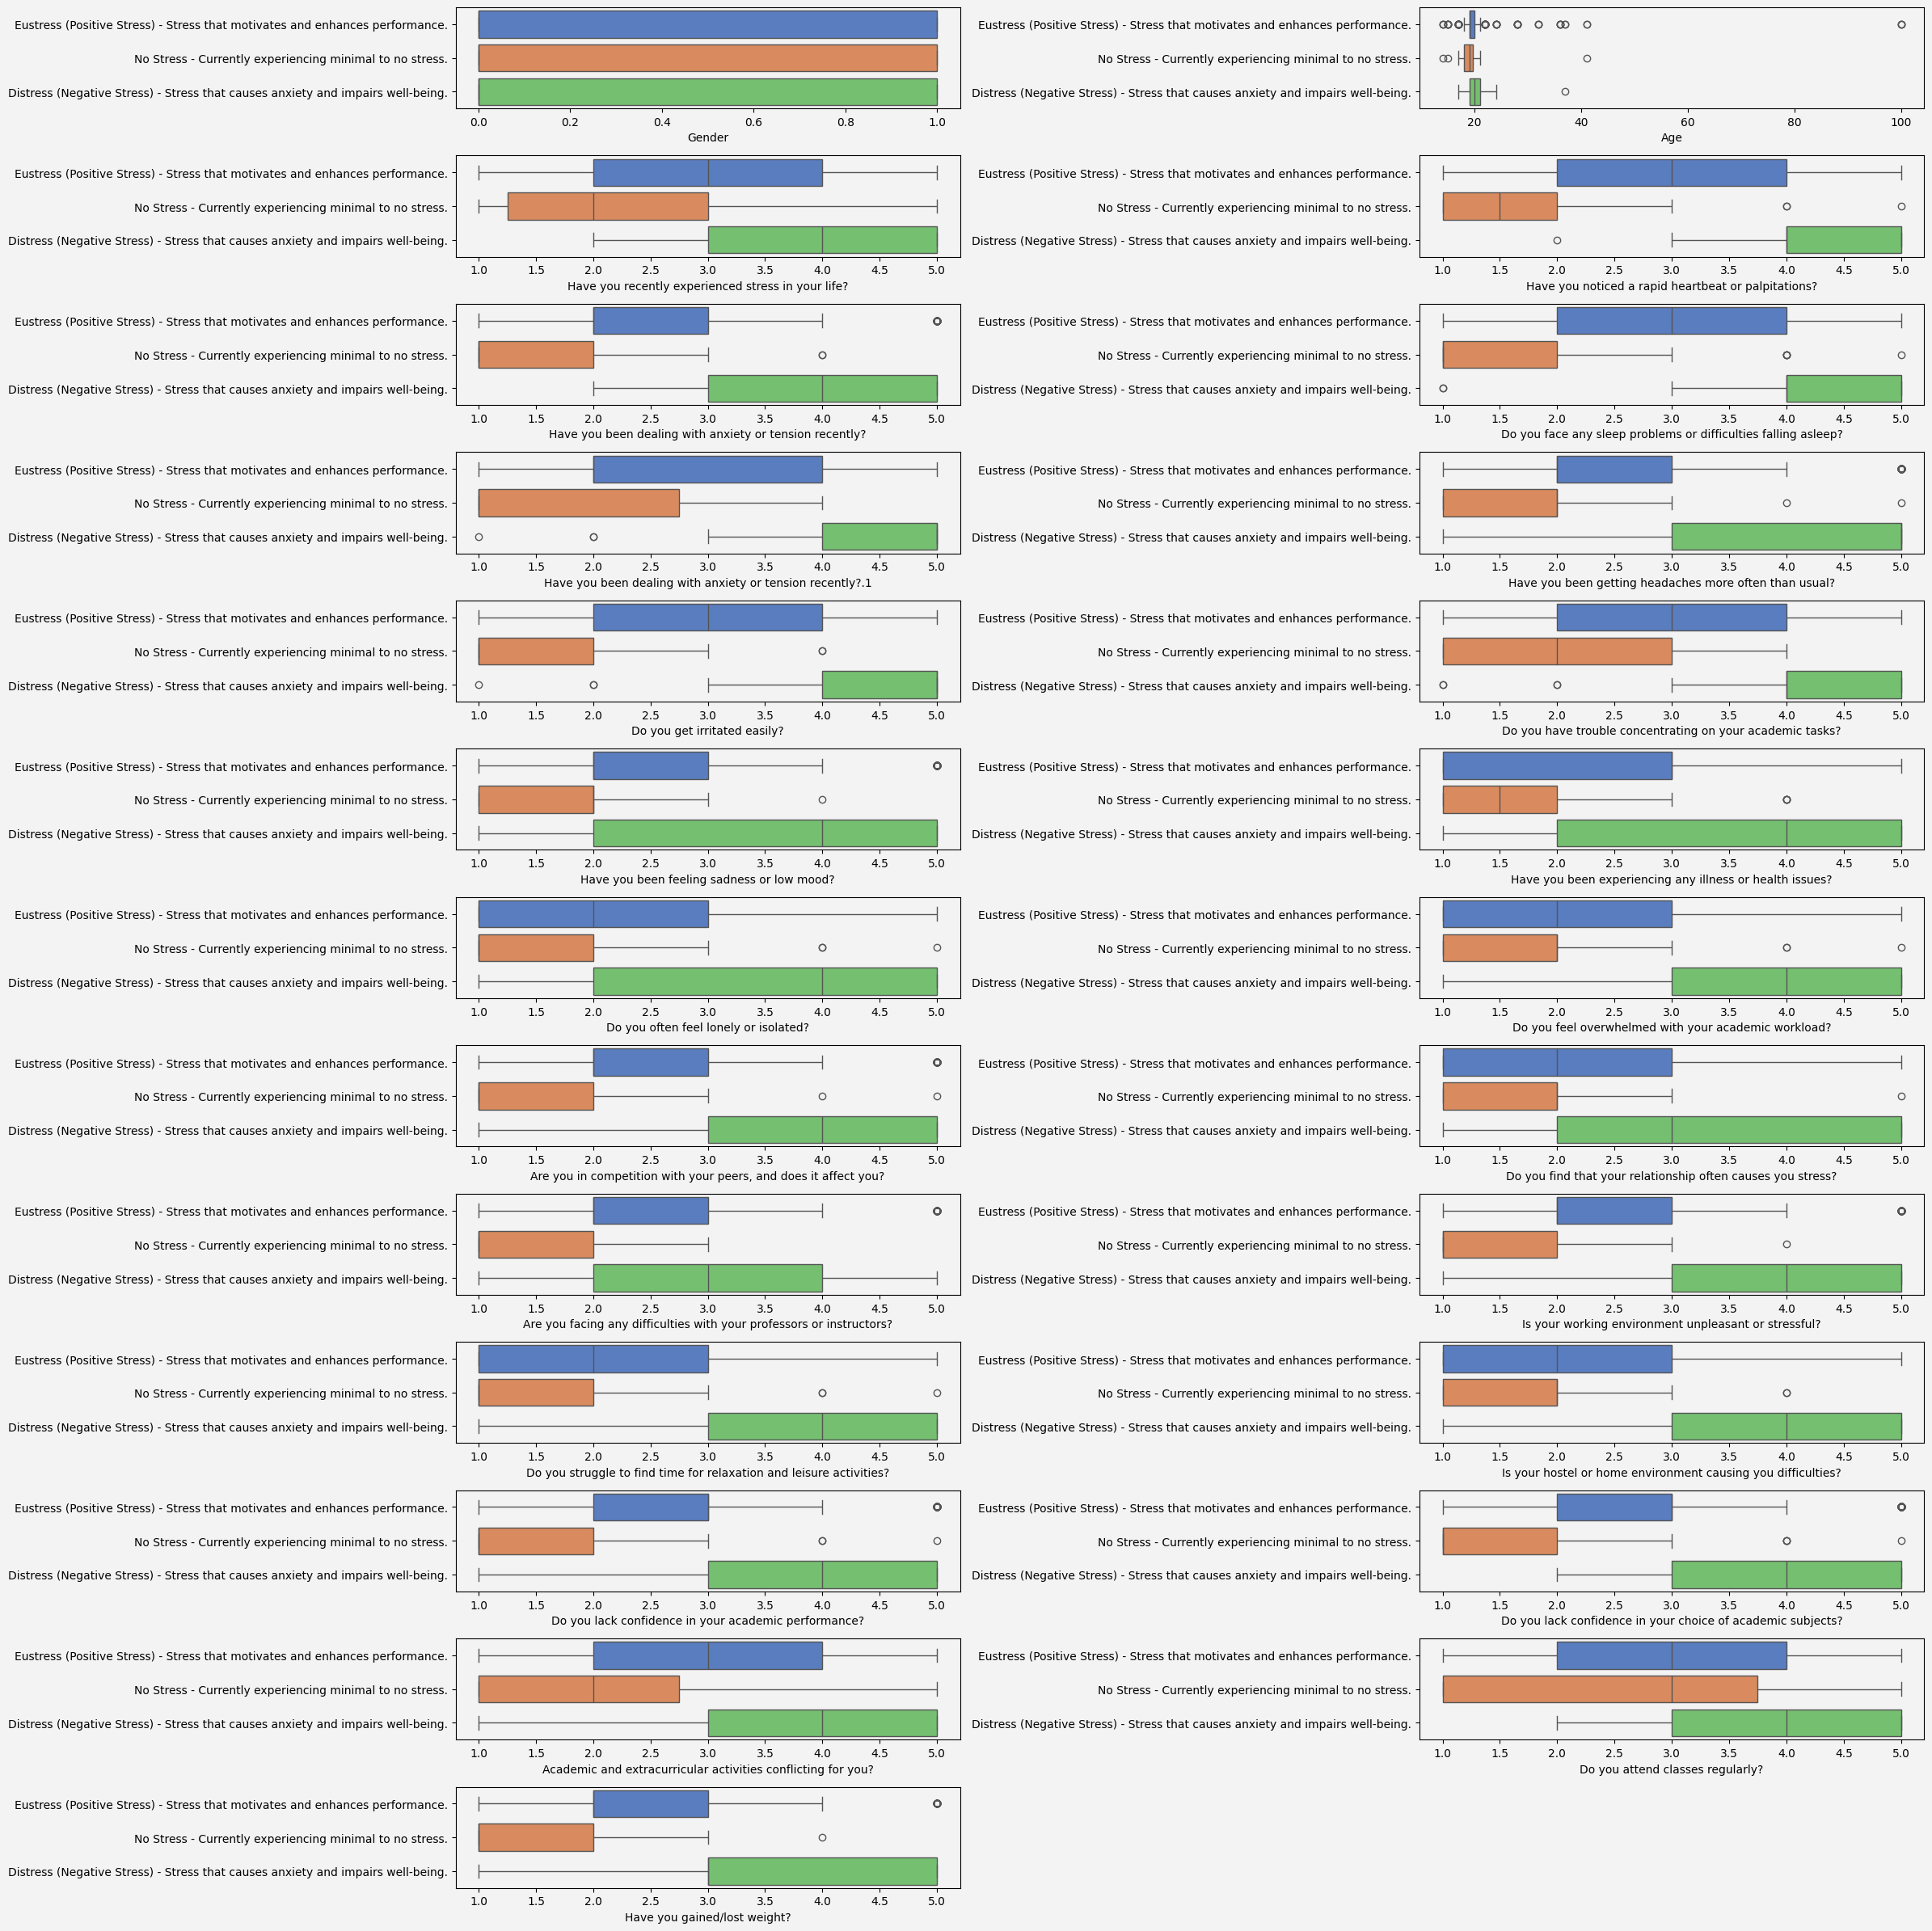

In [ ]:
# Select the numerical columns
# Create a 13x2 grid for 25 plots
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(24, 24))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], y=df['Which type of stress do you primarily experience?'], hue=df['Which type of stress do you primarily experience?'], palette='muted', ax=axes[i])
    axes[i].set_ylabel('')

# Turn off unused axes if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There are outliers in the Age column, which will be handled after splitting the dataset.

# EDA

## Check data distribution

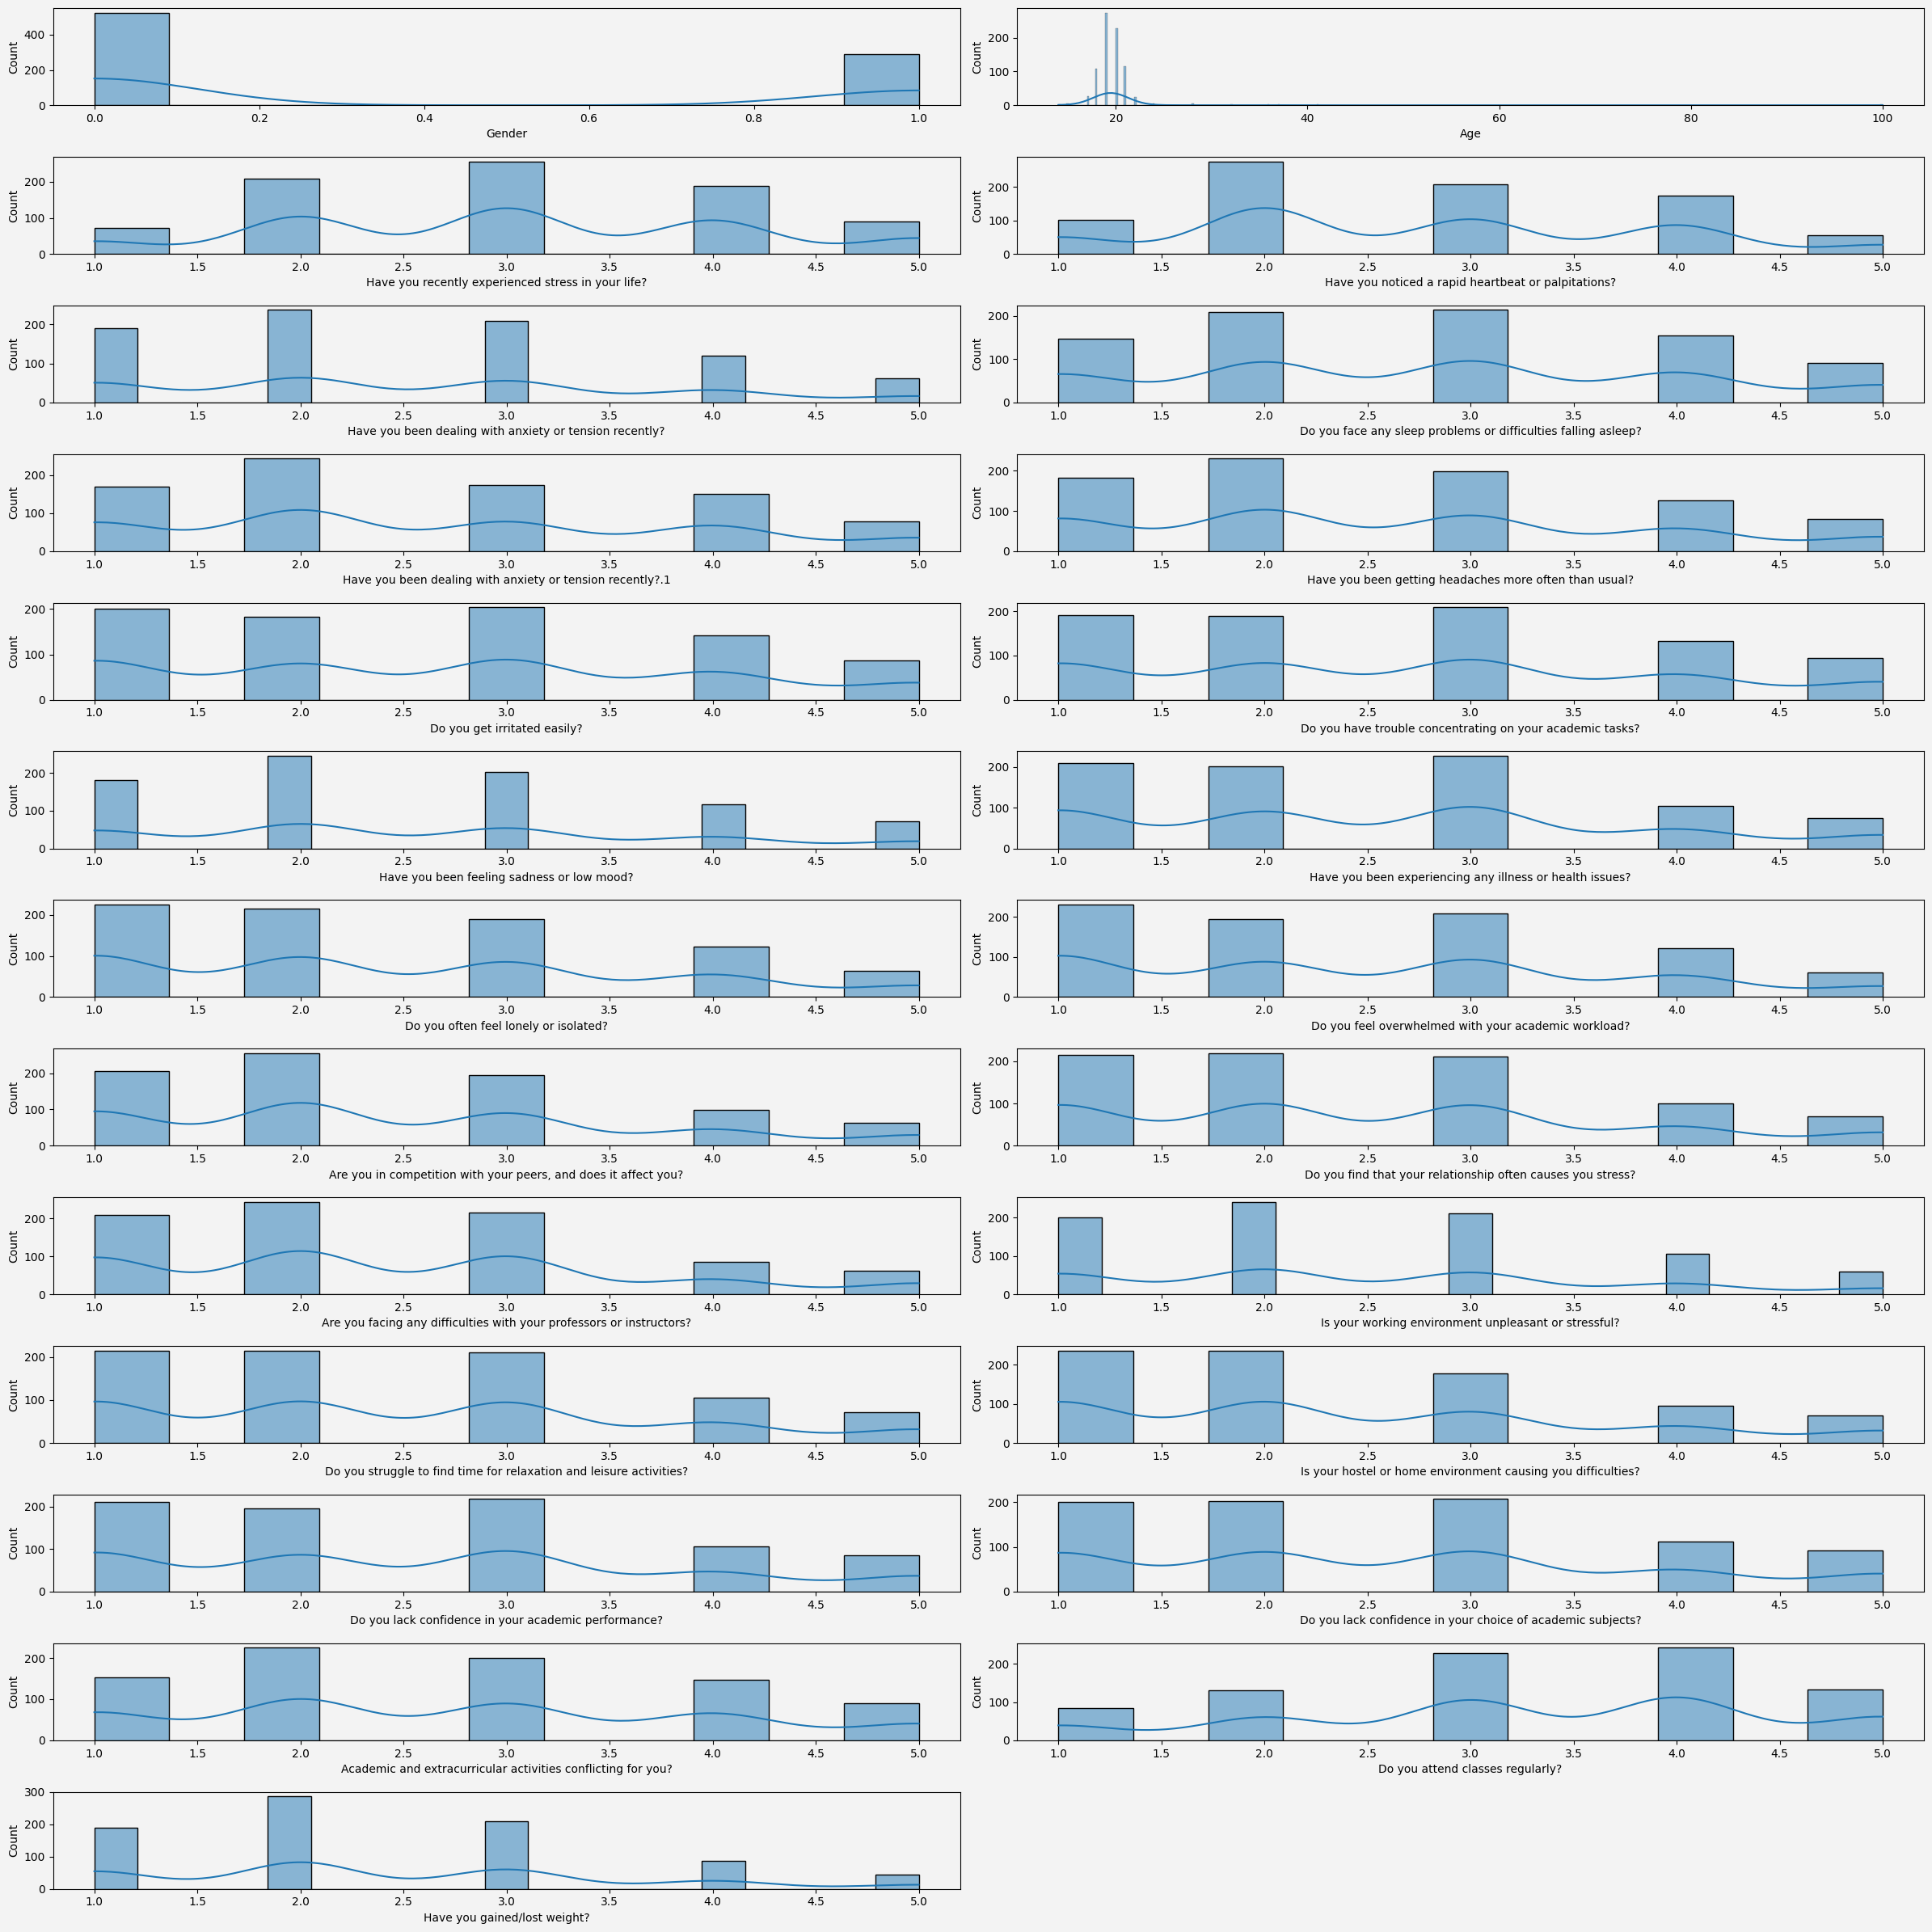

In [ ]:
# Select the numerical columns
# Create a 13x2 grid for 25 plots
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(24, 24))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])

# Turn off unused axes if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

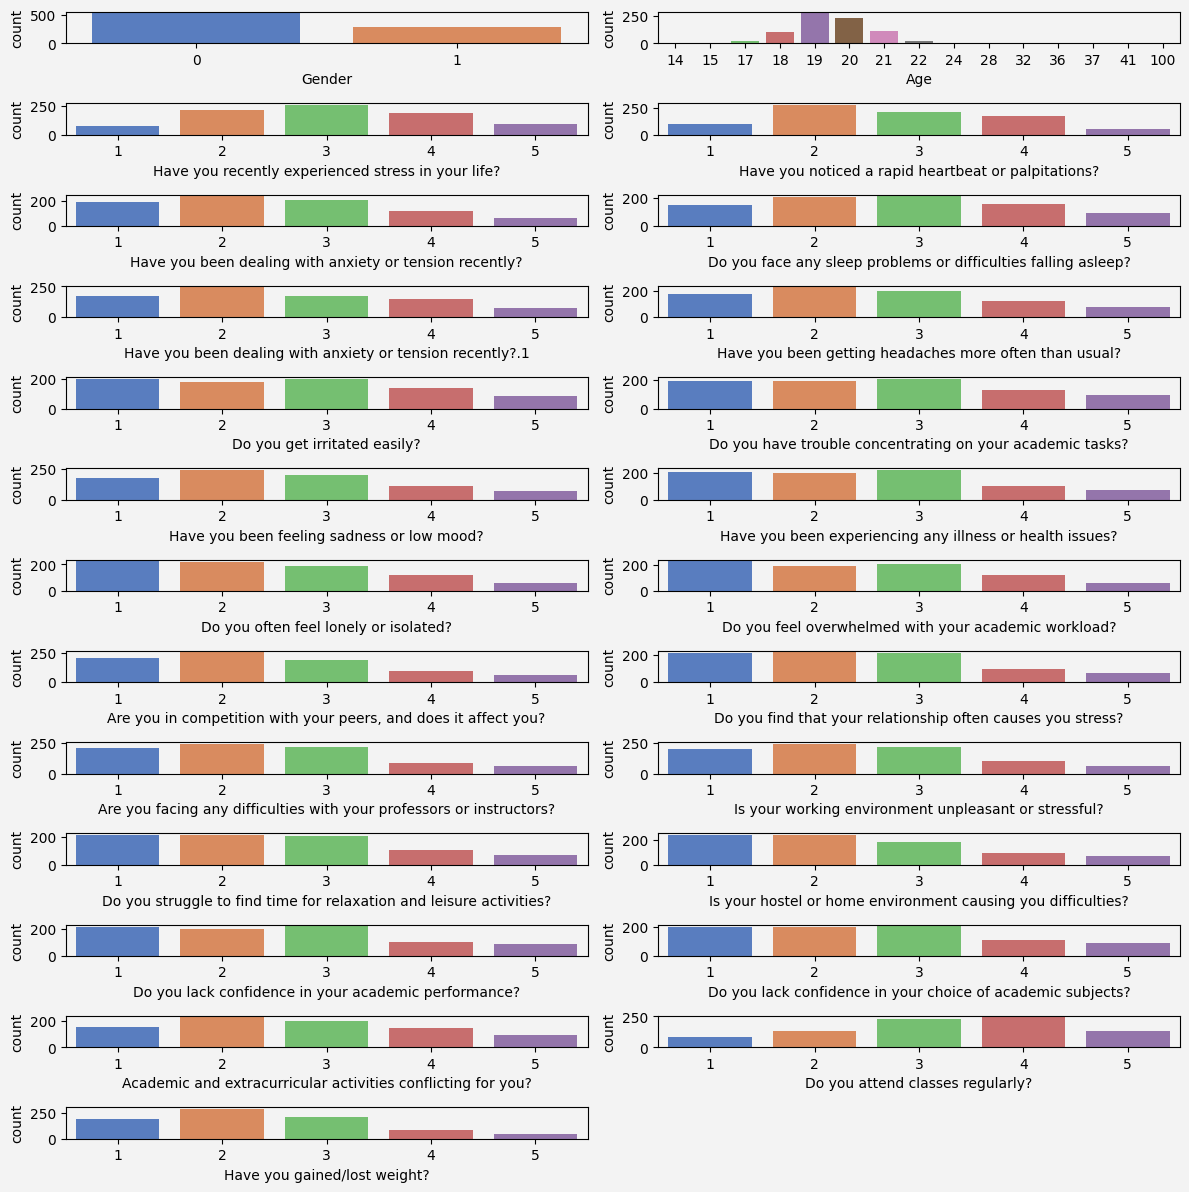

In [ ]:
# Select the categorical columns
# Create a 13x2 grid for 25 plots
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_cols):
    sns.countplot(df, x=col, hue=col, palette='muted', ax=axes[i])
    if axes[i].legend_:
        axes[i].legend_.remove()

# Turn off unused axes if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

High ratings (3–5) for questions like:

Have you recently experienced stress in your life?

Do you attend classes regularly?

Do you face any sleep problems or difficulties falling asleep?

## What features most distinguish “No Stress” students from those with Eustress based on academic workload?

<Axes: xlabel='Do you feel overwhelmed with your academic workload?', ylabel='Which type of stress do you primarily experience?'>

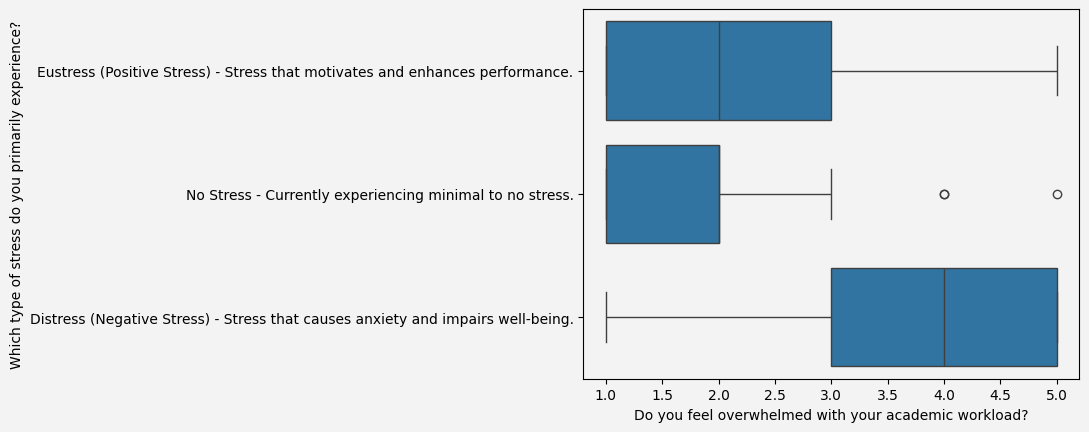

In [ ]:
sns.boxplot(y='Which type of stress do you primarily experience?', x='Do you feel overwhelmed with your academic workload?', data=df)

Students with high workload ratings are far more likely to fall into the distress category.

Eustress thrives in moderate pressure, while no stress correlates with low workload.

## Are there demographic patterns like Gender in stress type?

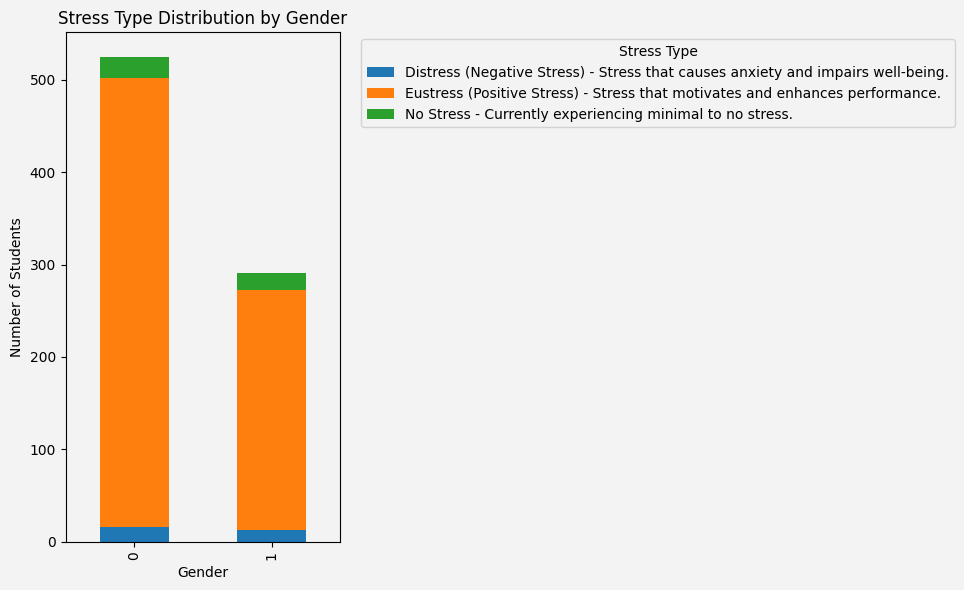

In [ ]:
ax = df.groupby(['Gender', 'Which type of stress do you primarily experience?']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(10, 6)
)

plt.legend(title='Stress Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Stress Type Distribution by Gender')
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

Stress is not gender-exclusive: Both genders show similar patterns in stress type distribution.

Eustress is common, but distress is concerning and deserves targeted intervention.

No stress is rare, which may indicate that most students are under some form of pressure.

## Which symptoms (e.g., headaches, sleep problems, sadness) are most predictive of stress type?

<Axes: >

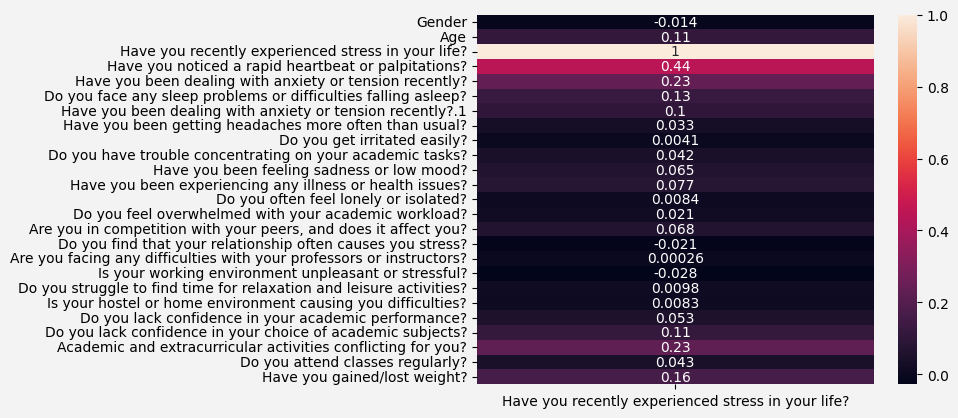

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Have you recently experienced stress in your life?']], annot=True)

Mental health symptoms (palpitations, gained/lost weight, anxiety, sleep issues) are tightly linked to stress perception.

Academic overload and extracurricular activities are a central driver: Students who feel overwhelmed are highly likely to report stress.

Environmental stressors (home, hostel, work setting) amplify the experience of stress.

## Do academic confidence and workload relate differently to Eustress vs. No Stress?

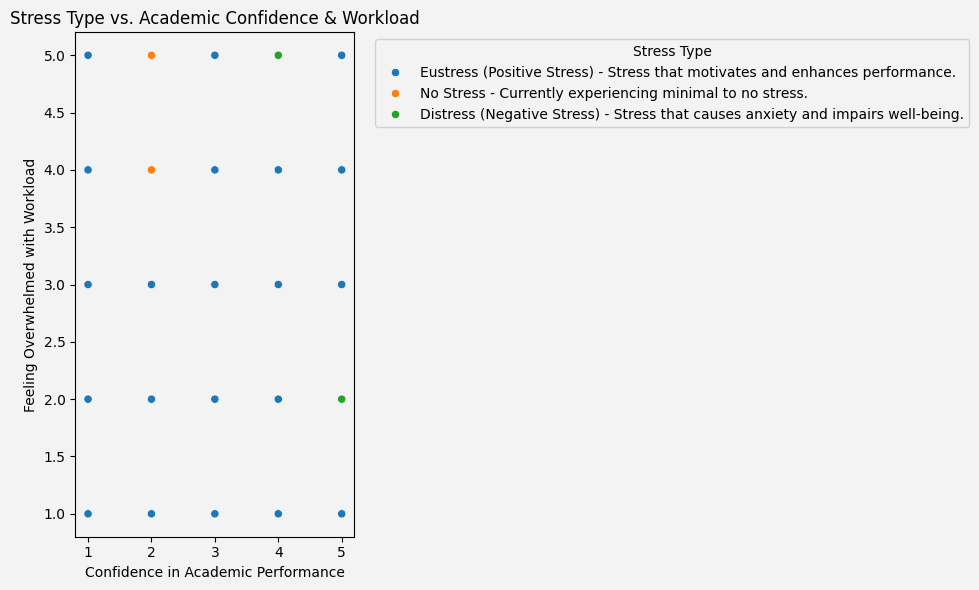

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x='Do you lack confidence in your academic performance?',
    y='Do you feel overwhelmed with your academic workload?',
    hue='Which type of stress do you primarily experience?',
    data=df
)

plt.legend(title='Stress Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Confidence in Academic Performance')
plt.ylabel('Feeling Overwhelmed with Workload')
plt.title('Stress Type vs. Academic Confidence & Workload')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

Confidence and workload perception are key predictors of stress type.

Students with high confidence and high/low workload are at greatest risk for distress.

Those with low confidence and high workload are most likely to report no stress.

Eustress thrives in the middle—where challenge meets capability.

## Does environment (home, hostel, professors) play a role in stress type?

In [ ]:
df.groupby('Which type of stress do you primarily experience?')[['Is your hostel or home environment causing you difficulties?', 'Are you facing any difficulties with your professors or instructors?']].mean()

Is your hostel or home environment causing you difficulties?  \
Which type of stress do you primarily experience?                                                                  
Distress (Negative Stress) - Stress that causes...                                           3.724138              
Eustress (Positive Stress) - Stress that motiva...                                           2.412081              
No Stress - Currently experiencing minimal to n...                                           1.761905              

                                                    Are you facing any difficulties with your professors or instructors?  
Which type of stress do you primarily experience?                                                                         
Distress (Negative Stress) - Stress that causes...                                           3.206897                     
Eustress (Positive Stress) - Stress that motiva...                                           2.468456                     
No Stress - Currently experiencing minimal to n...                                           1.547619

Students experiencing Distress (Negative Stress) report significantly higher difficulty with both:

Hostel/Home Environment → Average score: 3.72

Professors/Instructors → Average score: 3.21

Compared to:

Eustress students: Moderate difficulty (2.41 and 2.47)

No Stress students: Low difficulty (1.76 and 1.55)

## Split the Data

In [ ]:
target_column = 'Which type of stress do you primarily experience?'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(columns=[target_column]),
  df[target_column],
  test_size=0.2,
  random_state=42,
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((652, 25), (164, 25), (652,), (164,))

In [ ]:
# Statistical summary
X_train.describe()

Gender         Age  \
count  652.000000  652.000000   
mean     0.363497   20.191718   
std      0.481375    6.110985   
min      0.000000   14.000000   
25%      0.000000   19.000000   
50%      0.000000   19.000000   
75%      1.000000   20.000000   
max      1.000000  100.000000   

       Have you recently experienced stress in your life?  \
count                                         652.000000    
mean                                            3.032209    
std                                             1.134790    
min                                             1.000000    
25%                                             2.000000    
50%                                             3.000000    
75%                                             4.000000    
max                                             5.000000    

       Have you noticed a rapid heartbeat or palpitations?  \
count                                         652.000000     
mean                                            2.765337     
std                                             1.120331     
min                                             1.000000     
25%                                             2.000000     
50%                                             3.000000     
75%                                             4.000000     
max                                             5.000000     

       Have you been dealing with anxiety or tension recently?  \
count                                         652.000000         
mean                                            2.552147         
std                                             1.208792         
min                                             1.000000         
25%                                             2.000000         
50%                                             2.000000         
75%                                             3.000000         
max                                             5.000000         

       Do you face any sleep problems or difficulties falling asleep?  \
count                                         652.000000                
mean                                            2.780675                
std                                             1.258847                
min                                             1.000000                
25%                                             2.000000                
50%                                             3.000000                
75%                                             4.000000                
max                                             5.000000                

       Have you been dealing with anxiety or tension recently?.1  \
count                                         652.000000           
mean                                            2.668712           
std                                             1.255673           
min                                             1.000000           
25%                                             2.000000           
50%                                             2.000000           
75%                                             4.000000           
max                                             5.000000           

       Have you been getting headaches more often than usual?  \
count                                         652.000000        
mean                                            2.639571        
std                                             1.250683        
min                                             1.000000        
25%                                             2.000000        
50%                                             2.000000        
75%                                             4.000000        
max                                             5.000000        

       Do you get irritated easily?  \
count                    652.000000   
mean                       2.647239   
std                        1.287339

## Handling Ouliers

In [ ]:
# Calculate IQR for the Age Column
Q1 = X_train['Age'].quantile(0.25)
Q3 = X_train['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
upper_bound

np.float64(21.5)

In [ ]:
lower_bound

np.float64(17.5)

In [ ]:
# Replace values below the lower IQR bound with 18 and above the upper IQR bound with 21.
X_train['Age'] = X_train['Age'].apply(lambda x: 18 if x < lower_bound else (21 if x > upper_bound else x))
X_test['Age'] = X_test['Age'].apply(lambda x: 18 if x < lower_bound else (21 if x > upper_bound else x))

<Axes: xlabel='Age'>

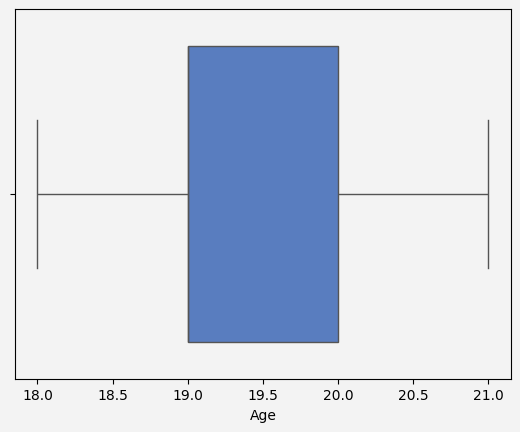

In [ ]:
# Recheck outliers
sns.boxplot(x=X_train['Age'], palette='muted')

## Bivariate Analysis

### Numeric vs numeric

In [ ]:
df_corr = df[numerical_cols].corr(method='spearman')
df_corr

Gender       Age  \
Gender                                              1.000000  0.023838   
Age                                                 0.023838  1.000000   
Have you recently experienced stress in your life? -0.012750  0.103852   
Have you noticed a rapid heartbeat or palpitati... -0.030480 -0.025200   
Have you been dealing with anxiety or tension r... -0.001096 -0.014739   
Do you face any sleep problems or difficulties ...  0.020319  0.009447   
Have you been dealing with anxiety or tension r... -0.031946  0.050408   
Have you been getting headaches more often than...  0.041717  0.101946   
Do you get irritated easily?                       -0.004920 -0.006926   
Do you have trouble concentrating on your acade... -0.001709  0.063729   
Have you been feeling sadness or low mood?          0.031397  0.088097   
Have you been experiencing any illness or healt...  0.011330  0.039979   
Do you often feel lonely or isolated?               0.022021  0.056186   
Do you feel overwhelmed with your academic work...  0.039193  0.033005   
Are you in competition with your peers, and doe...  0.022608  0.062343   
Do you find that your relationship often causes...  0.003222  0.042709   
Are you facing any difficulties with your profe... -0.003030  0.060910   
Is your working environment unpleasant or stres...  0.016005  0.055049   
Do you struggle to find time for relaxation and... -0.003851  0.001784   
Is your hostel or home environment causing you ... -0.020027 -0.025152   
Do you lack confidence in your academic perform...  0.030506  0.009572   
Do you lack confidence in your choice of academ...  0.041491  0.029867   
Academic and extracurricular activities conflic...  0.013229  0.096419   
Do you attend classes regularly?                    0.013271 -0.066164   
Have you gained/lost weight?                       -0.029222  0.035229   

                                                    Have you recently experienced stress in your life?  \
Gender                                                                                      -0.012750    
Age                                                                                          0.103852    
Have you recently experienced stress in your life?                                           1.000000    
Have you noticed a rapid heartbeat or palpitati...                                           0.434334    
Have you been dealing with anxiety or tension r...                                           0.228633    
Do you face any sleep problems or difficulties ...                                           0.128505    
Have you been dealing with anxiety or tension r...                                           0.106288    
Have you been getting headaches more often than...                                           0.027703    
Do you get irritated easily?                                                                 0.005663    
Do you have trouble concentrating on your acade...                                           0.048652    
Have you been feeling sadness or low mood?                                                   0.061290    
Have you been experiencing any illness or healt...                                           0.077371    
Do you often feel lonely or isolated?                                                        0.002354    
Do you feel overwhelmed with your academic work...                                           0.021536    
Are you in competition with your peers, and doe...                                           0.074886    
Do you find that your relationship often causes...                                          -0.018836    
Are you facing any difficulties with your profe...                                          -0.000159    
Is your working environment unpleasant or stres...                                          -0.039081    
Do you struggle to find time for relaxation and...                                          -0.008699    
Is your h

<Axes: >

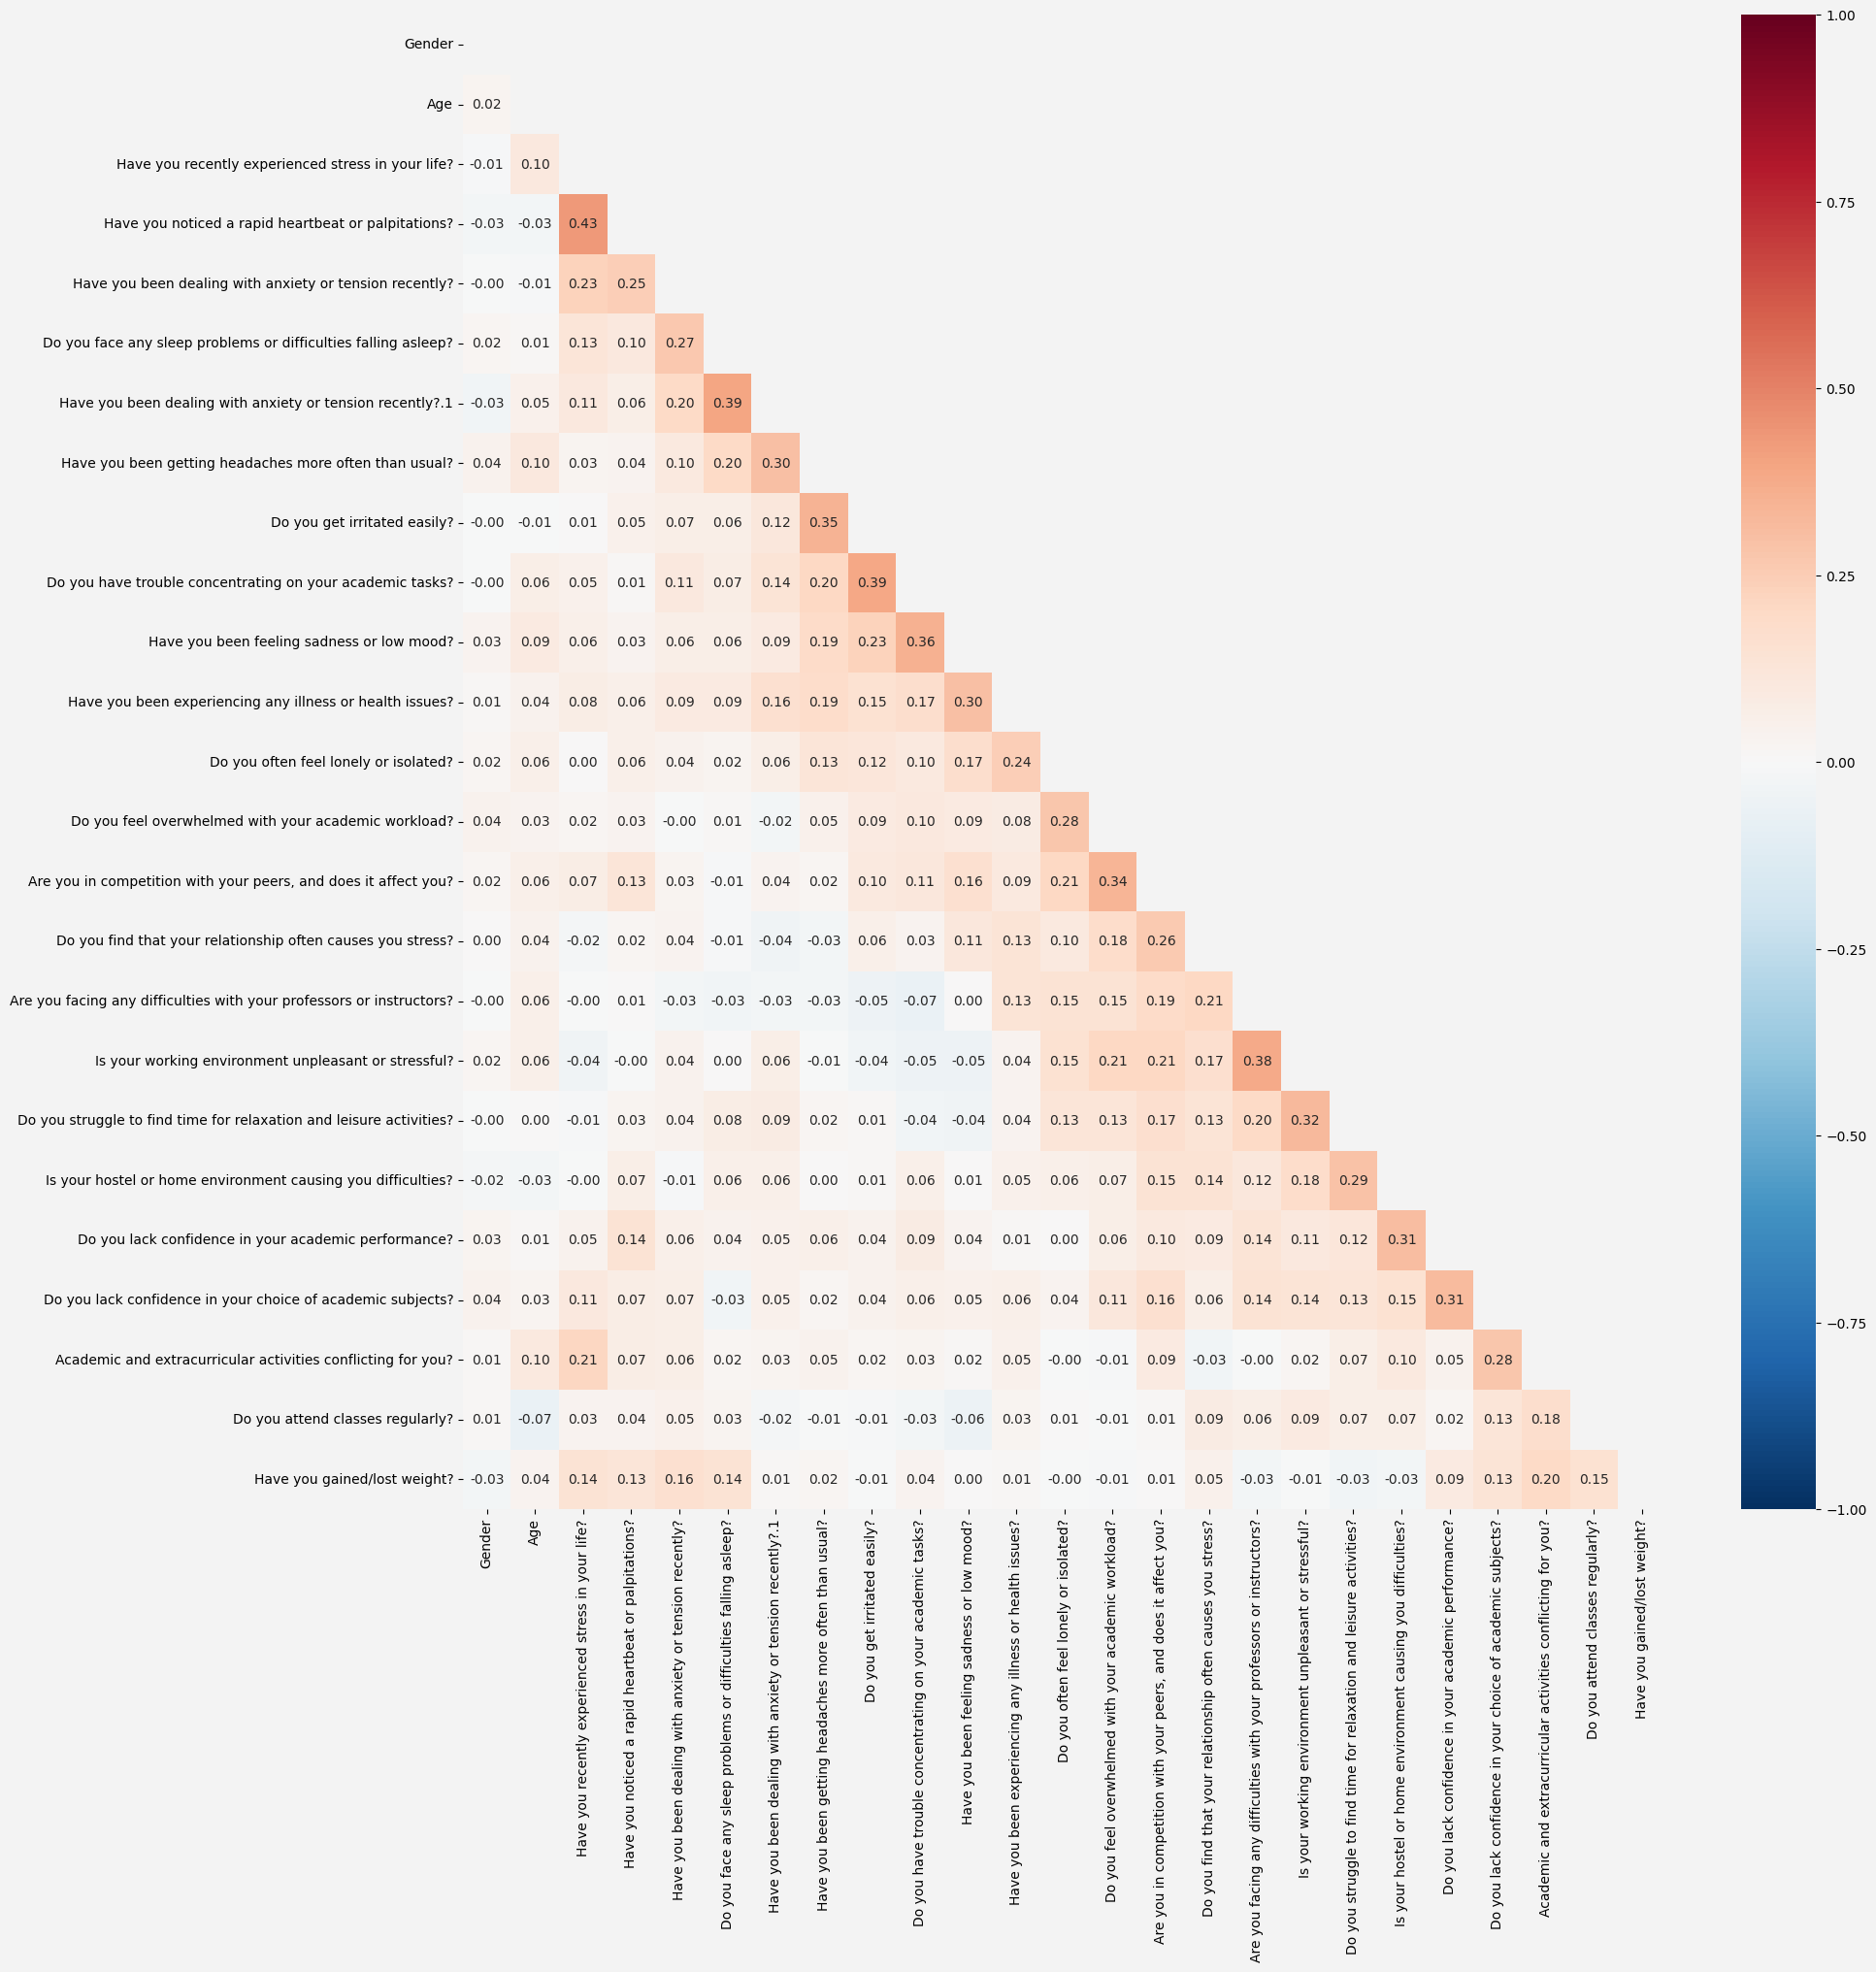

In [ ]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 20))
sns.heatmap(
  df_corr,
  vmin = -1,
  vmax = 1,
  annot = True,
  mask = mask,
  fmt = '.2f',
  cmap = 'RdBu_r',
)

There are no high correlations among the features.

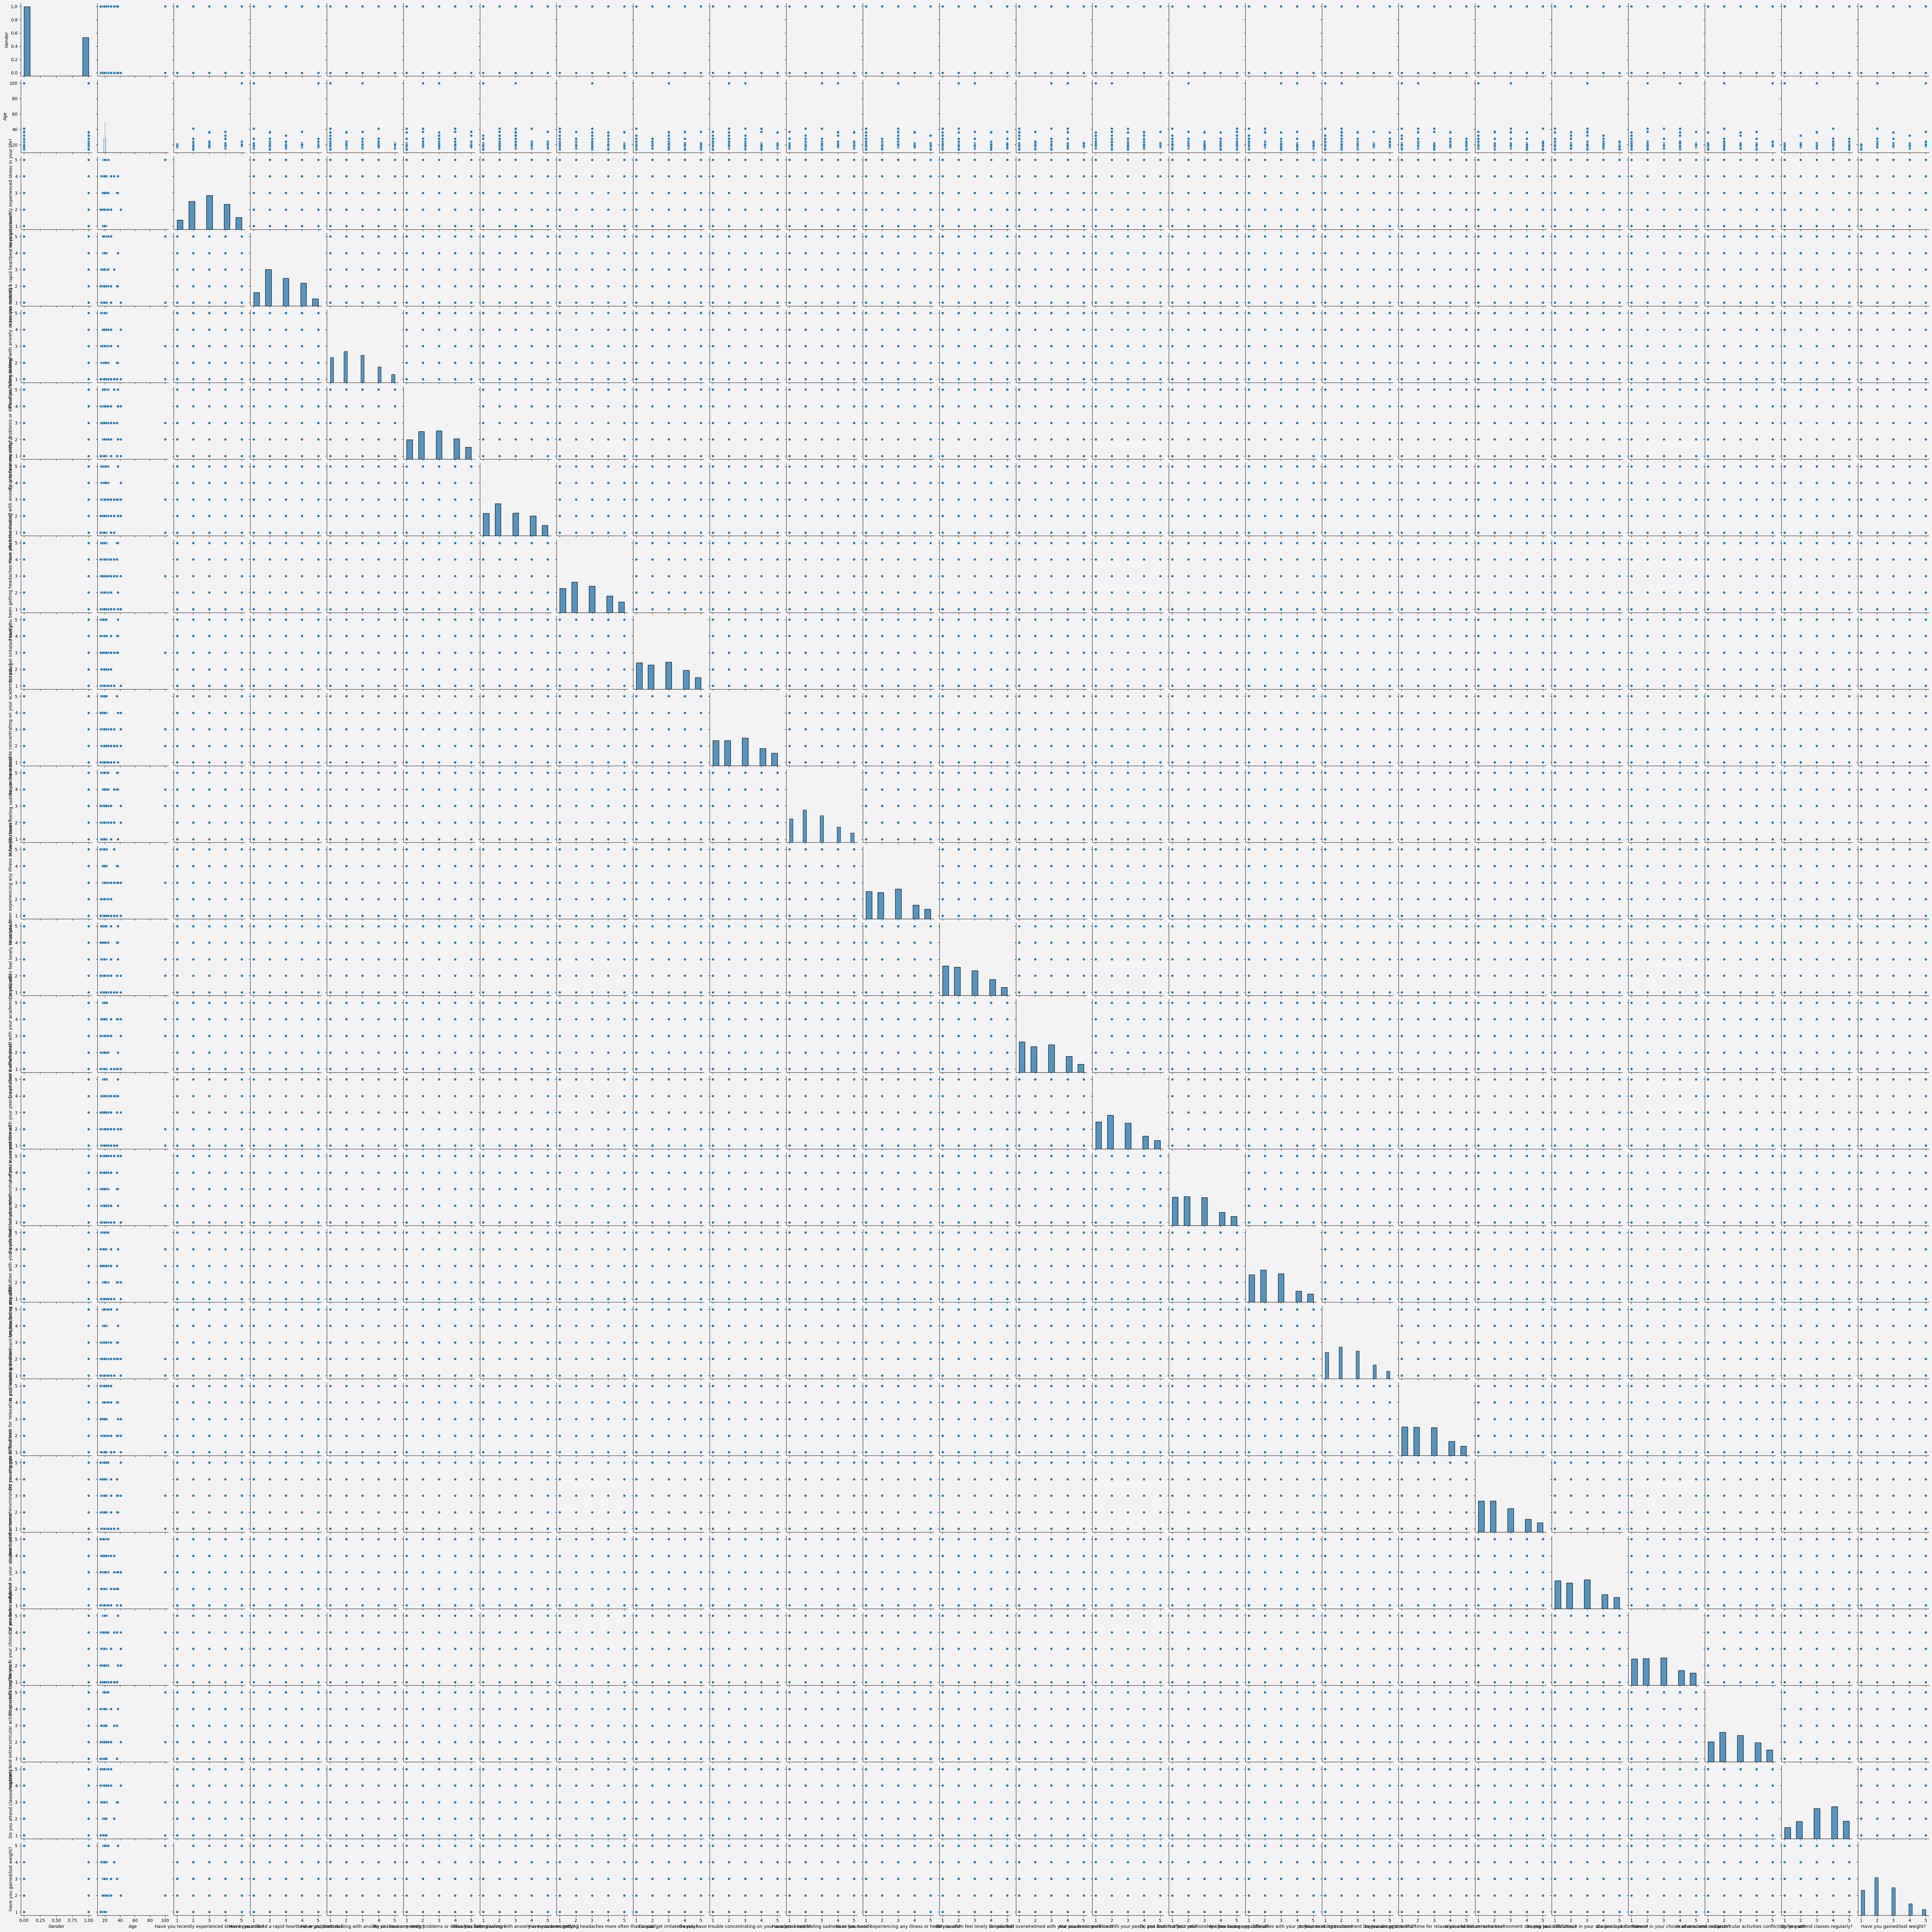

In [ ]:
sns.pairplot(df[numerical_cols])

# Feature Engineering

## Encode target

In [ ]:
label_map = {'No Stress - Currently experiencing minimal to no stress.': 0, 'Eustress (Positive Stress) - Stress that motivates and enhances performance.': 1, 'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.': 2}
y_train = y_train.map(label_map)
y_test = y_test.map(label_map)

In [ ]:
y_train.tail()

71     1
106    1
270    1
435    1
102    1
Name: Which type of stress do you primarily experience?, dtype: int64

## Handling multicollinearity

### Calculate VIF scores

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

feature  vif_score
1                                              Gender   1.024520
2                                                 Age   1.072287
3   Have you recently experienced stress in your l...   1.384751
4   Have you noticed a rapid heartbeat or palpitat...   1.362391
5   Have you been dealing with anxiety or tension ...   1.205314
6   Do you face any sleep problems or difficulties...   1.325765
7   Have you been dealing with anxiety or tension ...   1.398553
8   Have you been getting headaches more often tha...   1.398041
9                        Do you get irritated easily?   1.366378
10  Do you have trouble concentrating on your acad...   1.395266
11         Have you been feeling sadness or low mood?   1.342251
12  Have you been experiencing any illness or heal...   1.224457
13              Do you often feel lonely or isolated?   1.258085
14  Do you feel overwhelmed with your academic wor...   1.299239
15  Are you in competition with your peers, and do...   1.347461
16  Do you find that your relationship often cause...   1.257473
17  Are you facing any difficulties with your prof...   1.297009
18  Is your working environment unpleasant or stre...   1.359027
19  Do you struggle to find time for relaxation an...   1.269618
20  Is your hostel or home environment causing you...   1.332705
21  Do you lack confidence in your academic perfor...   1.301367
22  Do you lack confidence in your choice of acade...   1.314109
23  Academic and extracurricular activities confli...   1.253120
24                   Do you attend classes regularly?   1.093411
25                       Have you gained/lost weight?   1.181581

There are no multicollinearity.

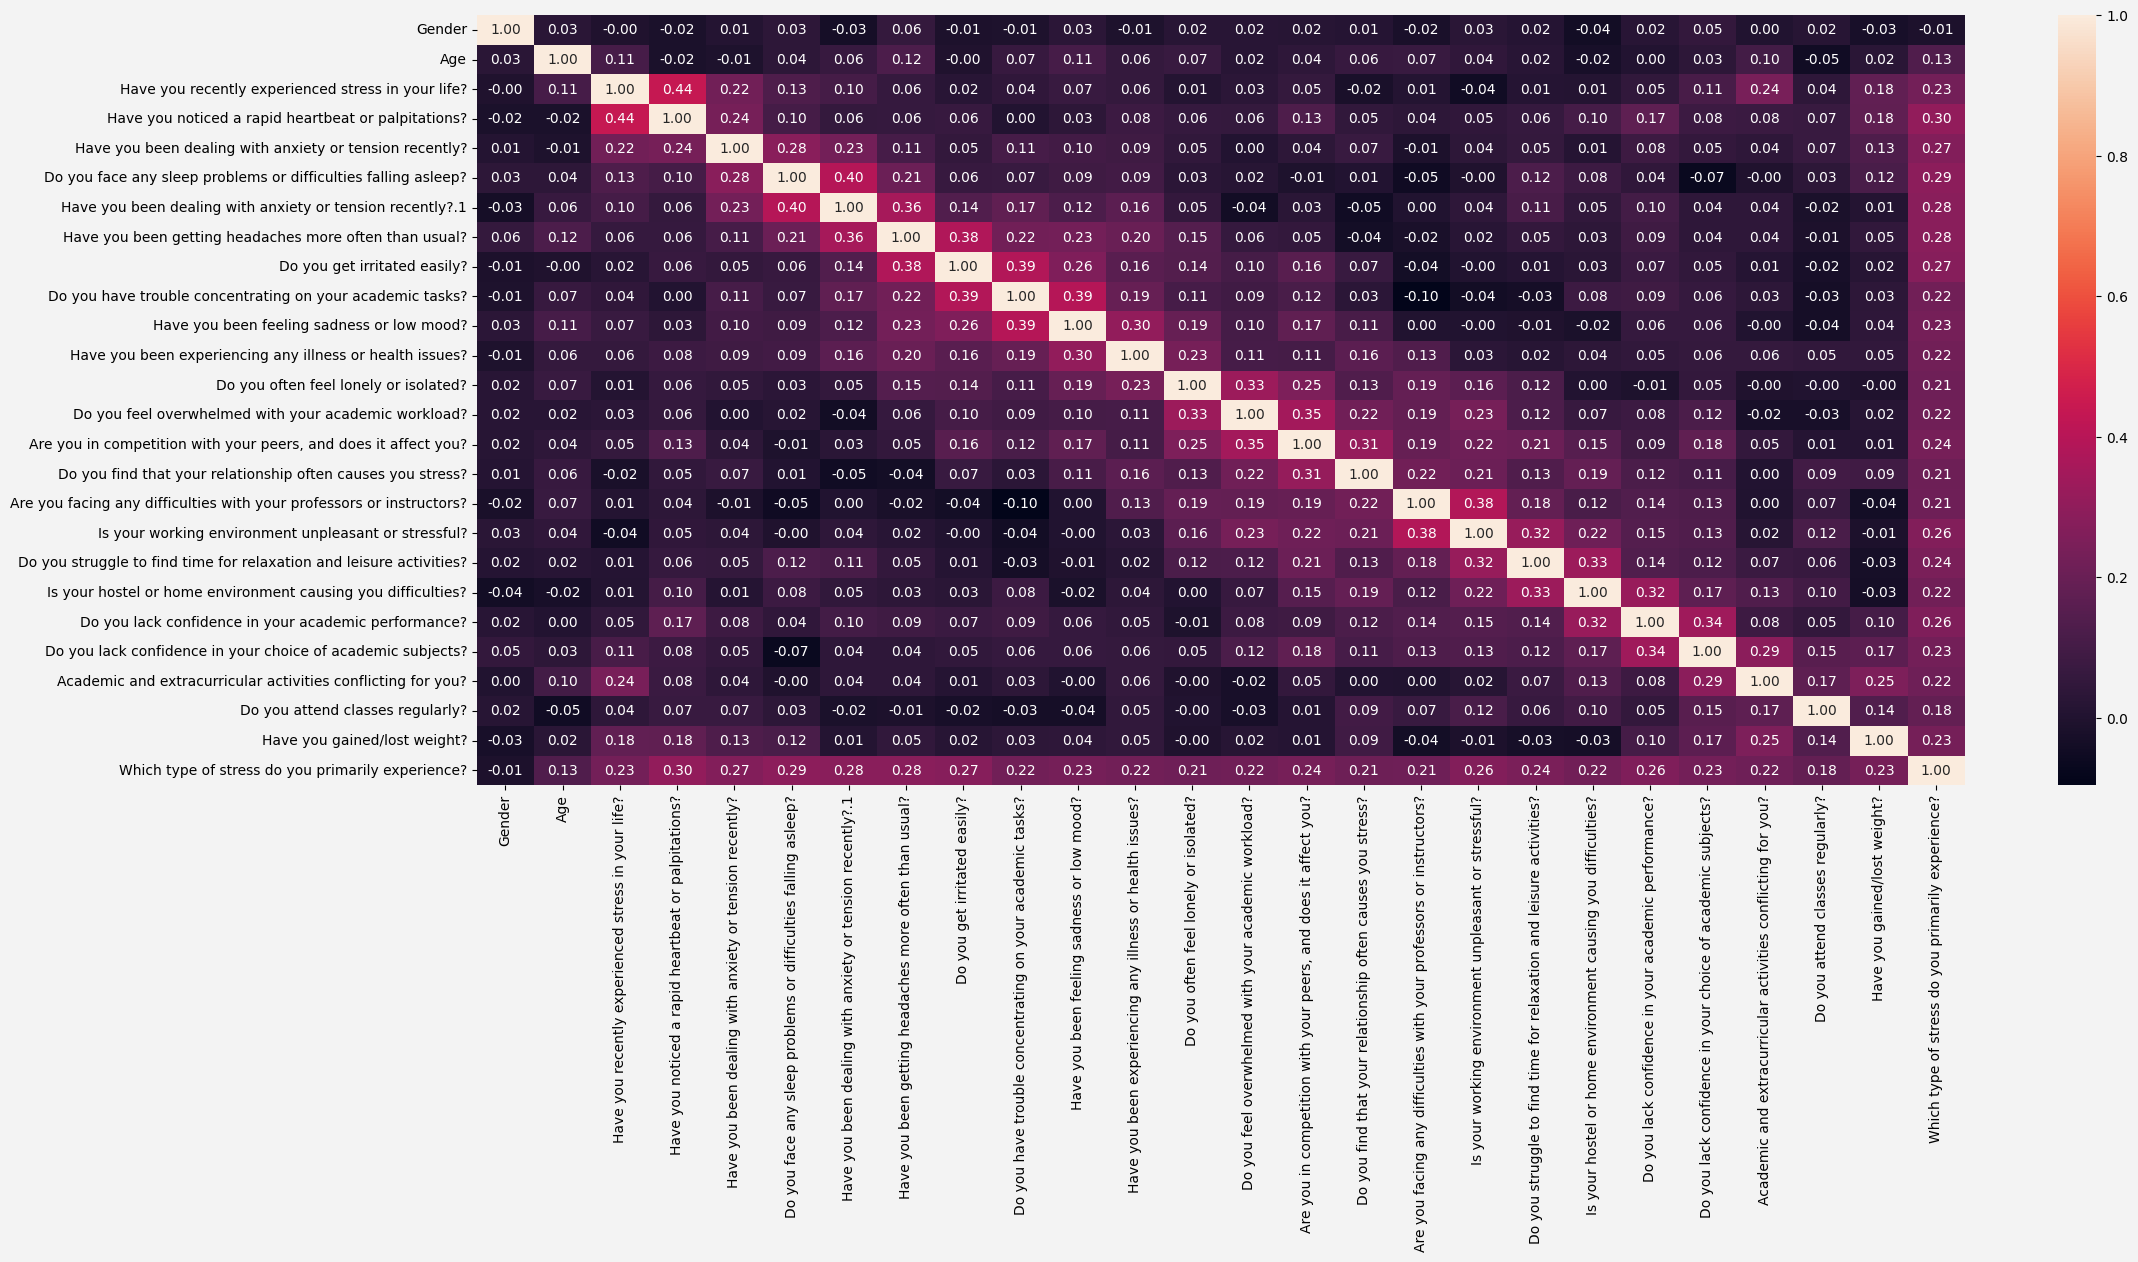

In [ ]:
# Array to dataframe
vif_target_train = pd.DataFrame(y_train, columns=['Which type of stress do you primarily experience?'])
vif_target_train

# Calculate the correlation
df_train = pd.concat([X_train, vif_target_train], axis=1)
corr = df_train.corr()

# Display the heatmap
plt.figure(figsize=(24,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Handle duplicate column

Since the column “Have you been dealing with anxiety or tension recently?” is duplicated, and the column “Have you been dealing with anxiety or tension recently?.1” shows a stronger correlation with the target variable, the original column will be removed.

In [ ]:
# Drop the “Have you been dealing with anxiety or tension recently?” column
X_train = X_train.drop(columns=['Have you been dealing with anxiety or tension recently?'])
X_test = X_test.drop(columns=['Have you been dealing with anxiety or tension recently?'])

In [ ]:
X_train.head()

Gender  Age  Have you recently experienced stress in your life?  \
448       0   19                                                  1    
335       0   20                                                  2    
294       0   21                                                  4    
692       0   19                                                  1    
79        0   21                                                  2    

     Have you noticed a rapid heartbeat or palpitations?  \
448                                                  2     
335                                                  3     
294                                                  4     
692                                                  1     
79                                                   3     

     Do you face any sleep problems or difficulties falling asleep?  \
448                                                  3                
335                                                  2                
294                                                  2                
692                                                  1                
79                                                   5                

     Have you been dealing with anxiety or tension recently?.1  \
448                                                  4           
335                                                  1           
294                                                  2           
692                                                  2           
79                                                   5           

     Have you been getting headaches more often than usual?  \
448                                                  2        
335                                                  2        
294                                                  3        
692                                                  3        
79                                                   1        

     Do you get irritated easily?  \
448                             3   
335                             2   
294                             3   
692                             2   
79                              2   

     Do you have trouble concentrating on your academic tasks?  \
448                                                  3           
335                                                  3           
294                                                  4           
692                                                  3           
79                                                   1           

     Have you been feeling sadness or low mood?  \
448                                           3   
335                                           2   
294                                           4   
692                                           4   
79                                            4   

     Have you been experiencing any illness or health issues?  \
448                                                  3          
335                                                  3          
294                                                  1          
692                                                  3          
79                                                   3          

     Do you often feel lonely or isolated?  \
448                                      3   
335                                      3   
294                                      3   
692                                      2   
79                                       3   

     Do you feel overwhelmed with your academic workload?  \
448                                                  2      
335                                                  1      
294                                                  1      
692                                                  3      
79                                                   2      

     Are you in competition with your peers, a

## Scale numeric features

In [ ]:
col_to_scale = 'Age'

In [ ]:
scaler = MinMaxScaler()

X_train[col_to_scale + '_Scaled'] = scaler.fit_transform(X_train[[col_to_scale]])
X_test[col_to_scale + '_Scaled'] = scaler.transform(X_test[[col_to_scale]])

X_train = X_train.drop(columns=col_to_scale)
X_test = X_test.drop(columns=col_to_scale)

In [ ]:
X_train.describe()

Gender  Have you recently experienced stress in your life?  \
count  652.000000                                         652.000000    
mean     0.363497                                           3.032209    
std      0.481375                                           1.134790    
min      0.000000                                           1.000000    
25%      0.000000                                           2.000000    
50%      0.000000                                           3.000000    
75%      1.000000                                           4.000000    
max      1.000000                                           5.000000    

       Have you noticed a rapid heartbeat or palpitations?  \
count                                         652.000000     
mean                                            2.765337     
std                                             1.120331     
min                                             1.000000     
25%                                             2.000000     
50%                                             3.000000     
75%                                             4.000000     
max                                             5.000000     

       Do you face any sleep problems or difficulties falling asleep?  \
count                                         652.000000                
mean                                            2.780675                
std                                             1.258847                
min                                             1.000000                
25%                                             2.000000                
50%                                             3.000000                
75%                                             4.000000                
max                                             5.000000                

       Have you been dealing with anxiety or tension recently?.1  \
count                                         652.000000           
mean                                            2.668712           
std                                             1.255673           
min                                             1.000000           
25%                                             2.000000           
50%                                             2.000000           
75%                                             4.000000           
max                                             5.000000           

       Have you been getting headaches more often than usual?  \
count                                         652.000000        
mean                                            2.639571        
std                                             1.250683        
min                                             1.000000        
25%                                             2.000000        
50%                                             2.000000        
75%                                             4.000000        
max                                             5.000000        

       Do you get irritated easily?  \
count                    652.000000   
mean                       2.647239   
std                        1.287339   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        5.000000   

       Do you have trouble concentrating on your academic tasks?  \
count                                         652.000000           
mean                                            2.670245           
std                                             1.309368           
min                                             1.000000           
25%                                             2.000000           
50%                                             3.000000           
75%                                             4.000000           
max                                      

# Modelling

In [ ]:
df[target_column].value_counts()

Which type of stress do you primarily experience?
Eustress (Positive Stress) - Stress that motivates and enhances performance.       745
No Stress - Currently experiencing minimal to no stress.                            42
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     29
Name: count, dtype: int64

In [ ]:
len(df[df['Which type of stress do you primarily experience?'] =='No Stress - Currently experiencing minimal to no stress.']) / len(df['Which type of stress do you primarily experience?']) * 100

5.147058823529411

In [ ]:
len(df[df['Which type of stress do you primarily experience?'] =='Eustress (Positive Stress) - Stress that motivates and enhances performance.']) / len(df['Which type of stress do you primarily experience?']) * 100

91.29901960784314

In [ ]:
len(df[df['Which type of stress do you primarily experience?'] =='Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.']) / len(df['Which type of stress do you primarily experience?']) * 100

3.553921568627451

Only 5.1% of students reported no stress, while 91.3% experienced eustress and 3.6% experienced distress.

The dataset is imbalanced. Recall is chosen as the evaluation metric because, although distress cases make up only 3.6% of the data, they are the most critical to identify. Early detection and intervention are essential since distress negatively impacts well-being, contributes to academic burnout, and can escalate into serious mental health problems. Despite being the smallest group, students experiencing distress require the greatest attention.

Since this is a multiclass classification problem with imbalanced data, and the goal is to identify distress, which is a minority class, macro recall is the best option—it ensures that distress receives equal attention, even though it is rare.”

## KNN

In [ ]:
model_knn = KNeighborsClassifier()

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_gridcv = GridSearchCV(model_knn, parameters, cv=5, scoring='recall_macro')
knn_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall_macro')

In [ ]:
# The compact results
knn_cv_result = pd.DataFrame(knn_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
knn_cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
0  {'n_neighbors': 2}         0.680999                1
1  {'n_neighbors': 3}         0.647255                2
2  {'n_neighbors': 4}         0.647143                3
4  {'n_neighbors': 6}         0.610280                4
3  {'n_neighbors': 5}         0.609034                5
5  {'n_neighbors': 7}         0.566106                6
6  {'n_neighbors': 8}         0.530700                7

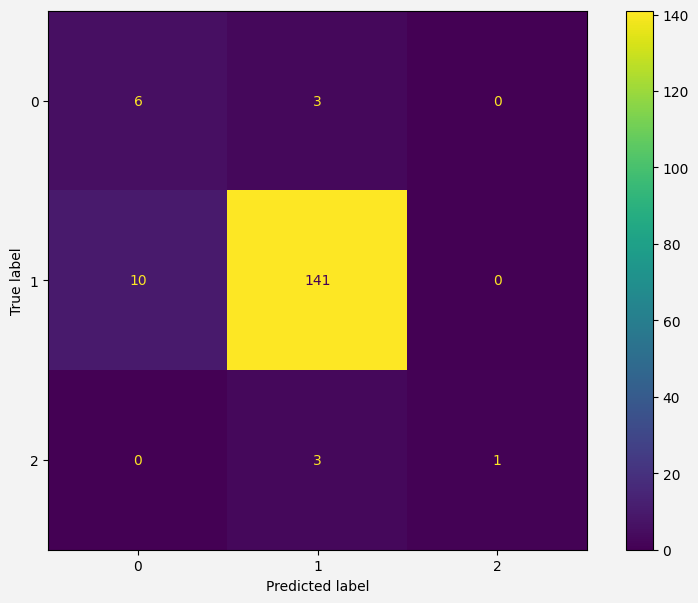

In [ ]:
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Classification report
y_pred = knn_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.67      0.48         9
           1       0.96      0.93      0.95       151
           2       1.00      0.25      0.40         4

    accuracy                           0.90       164
   macro avg       0.78      0.62      0.61       164
weighted avg       0.93      0.90      0.91       164



The model is underfitting.

## Random Forest

In [ ]:
# Handle class imbalance using class_weight
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# Note: use recall
rf_gridcv = GridSearchCV(model_rf, parameters, cv=5, scoring='recall_macro')
rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall_macro')

In [ ]:
# The results
rf_cv_result = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
rf_cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
9   {'max_depth': 2, 'n_estimators': 50}         0.815791                1
8   {'max_depth': 2, 'n_estimators': 40}         0.802462                2
7   {'max_depth': 2, 'n_estimators': 30}         0.780245                3
14  {'max_depth': 3, 'n_estimators': 50}         0.760434                4
13  {'max_depth': 3, 'n_estimators': 40}         0.748767                5
4   {'max_depth': 1, 'n_estimators': 50}         0.734601                6
6   {'max_depth': 2, 'n_estimators': 20}         0.734325                7
3   {'max_depth': 1, 'n_estimators': 40}         0.722887                8
2   {'max_depth': 1, 'n_estimators': 30}         0.712402                9
5   {'max_depth': 2, 'n_estimators': 10}         0.711345               10
12  {'max_depth': 3, 'n_estimators': 30}         0.709313               11
10  {'max_depth': 3, 'n_estimators': 10}         0.706484               12
1   {'max_depth': 1, 'n_estimators': 20}         0.688541               13
18  {'max_depth': 4, 'n_estimators': 40}         0.678973               14
17  {'max_depth': 4, 'n_estimators': 30}         0.666732               15
11  {'max_depth': 3, 'n_estimators': 20}         0.663132               16
15  {'max_depth': 4, 'n_estimators': 10}         0.658197               17
16  {'max_depth': 4, 'n_estimators': 20}         0.652166               18
19  {'max_depth': 4, 'n_estimators': 50}         0.646125               19
0   {'max_depth': 1, 'n_estimators': 10}         0.643765               20
21  {'max_depth': 5, 'n_estimators': 20}         0.626531               21
20  {'max_depth': 5, 'n_estimators': 10}         0.606564               22
22  {'max_depth': 5, 'n_estimators': 30}         0.604304               23
23  {'max_depth': 5, 'n_estimators': 40}         0.579323               24
24  {'max_depth': 5, 'n_estimators': 50}         0.560373               25

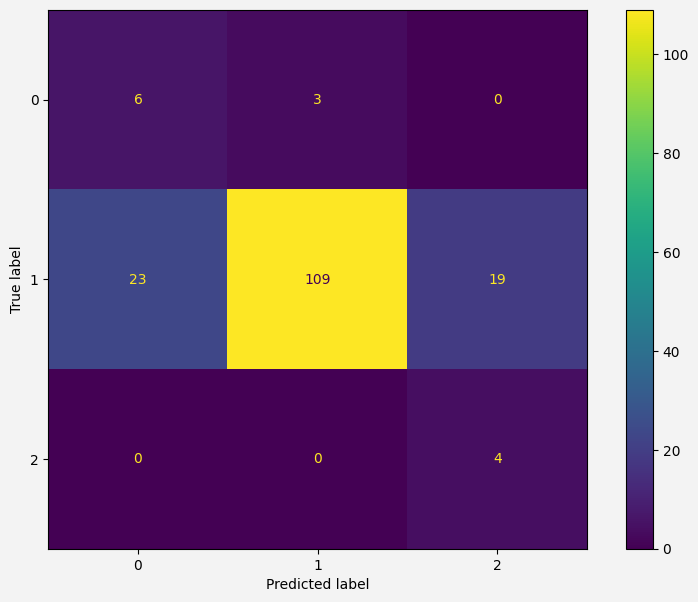

In [ ]:
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Classification report
y_pred = rf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.67      0.32         9
           1       0.97      0.72      0.83       151
           2       0.17      1.00      0.30         4

    accuracy                           0.73       164
   macro avg       0.45      0.80      0.48       164
weighted avg       0.91      0.73      0.79       164



This model is excellent at catching distress, which aligns with the goal. But it struggles to distinguish no stress from distress.

## XGBoost

In [ ]:
model_xgb = xgb.XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)

In [ ]:
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

# Handle class imbalance using sample weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
model_xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Note: use recall
xgb_gridcv = GridSearchCV(model_xgb, parameters, cv=5, scoring='recall_macro')
xgb_gridcv.fit(X_train, y_train, sample_weight=sample_weights)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='recall_macro')

In [ ]:
# The results
xgb_cv_result = pd.DataFrame(xgb_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
xgb_cv_result[retain_cols].sort_values('rank_test_score').head(10)

params  mean_test_score  \
435  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.855149   
438  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.855149   
447  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.854589   
474  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.851227   
456  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.842357   
465  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.840135   
681  {'colsample_bytree': 1.0, 'gamma': 5, 'learnin...         0.840135   
480  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.838459   
483  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.838454   
462  {'colsample_bytree': 0.8, 'gamma': 5, 'learnin...         0.837894   

     rank_test_score  
435                1  
438                1  
447                3  
474                4  
456                5  
465                6  
681                6  
480                8  
483                9  
462               10

In [ ]:
# best params
xgb_cv_result.loc[435].params

{'colsample_bytree': 0.8,
 'gamma': 5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.6}

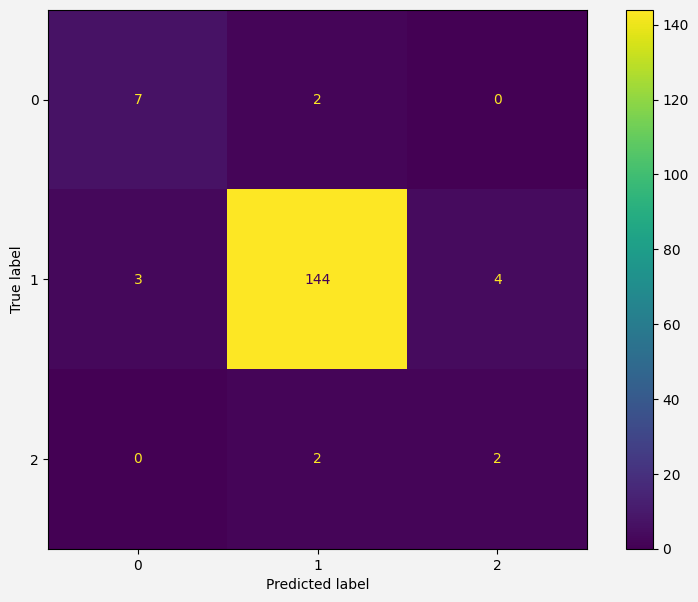

In [ ]:
# plotting confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred = xgb_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=xgb_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
y_pred = xgb_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.97      0.95      0.96       151
           2       0.33      0.50      0.40         4

    accuracy                           0.93       164
   macro avg       0.67      0.74      0.70       164
weighted avg       0.94      0.93      0.94       164



The model is very good at identifying No Stress, and moderately successful at catching Distress.

## SVM

In [ ]:
y_train.value_counts(normalize=True)

Which type of stress do you primarily experience?
1    0.911043
0    0.050613
2    0.038344
Name: proportion, dtype: float64

In [ ]:
svm_clf = SVC(
    decision_function_shape='ovo',
    random_state = 42,
    probability=True,
    class_weight = {0: 0.050613, 1:0.911043, 2:0.038344}
)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

svm_gridcv = GridSearchCV(svm_clf, param_grid, cv=5, scoring='recall_macro')
svm_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight={0: 0.050613, 1: 0.911043, 2: 0.038344},
                           decision_function_shape='ovo', probability=True,
                           random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='recall_macro')

In [ ]:
# The results
svm_cv_result = pd.DataFrame(svm_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
svm_cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  \
12  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}         0.780724   
14   {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}         0.780724   
10    {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}         0.776690   
8    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}         0.776690   
13     {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}         0.747428   
15      {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}         0.726256   
6      {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}         0.686667   
4     {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}         0.686667   
2    {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}         0.346667   
0   {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}         0.346667   
9       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}         0.346667   
11       {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}         0.342857   
7         {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}         0.333333   
5        {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}         0.333333   
1      {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}         0.333333   
3       {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}         0.333333   

    rank_test_score  
12                1  
14                1  
10                3  
8                 3  
13                5  
15                6  
6                 7  
4                 7  
2                 9  
0                 9  
9                 9  
11               12  
7                13  
5                13  
1                13  
3                13

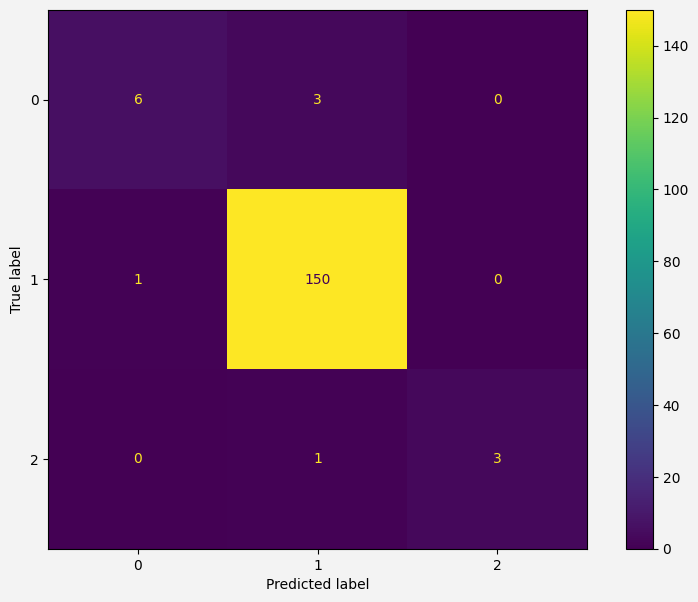

In [ ]:
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred = svm_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=svm_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svm_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Classification report
y_pred = svm_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.97      0.99      0.98       151
           2       1.00      0.75      0.86         4

    accuracy                           0.97       164
   macro avg       0.94      0.80      0.86       164
weighted avg       0.97      0.97      0.97       164



This model has moderate-recall result, this model is also achieving high precision and recall across all classes. It’s especially strong at avoiding false positives for distress, which is ideal for sensitive interventions.

# Evaluation

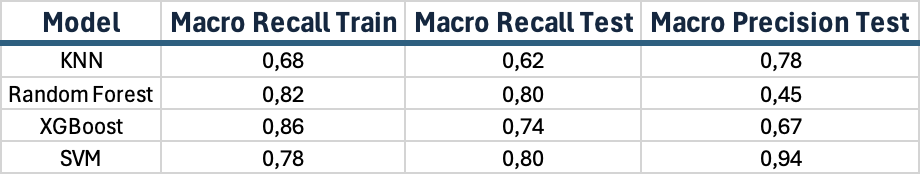

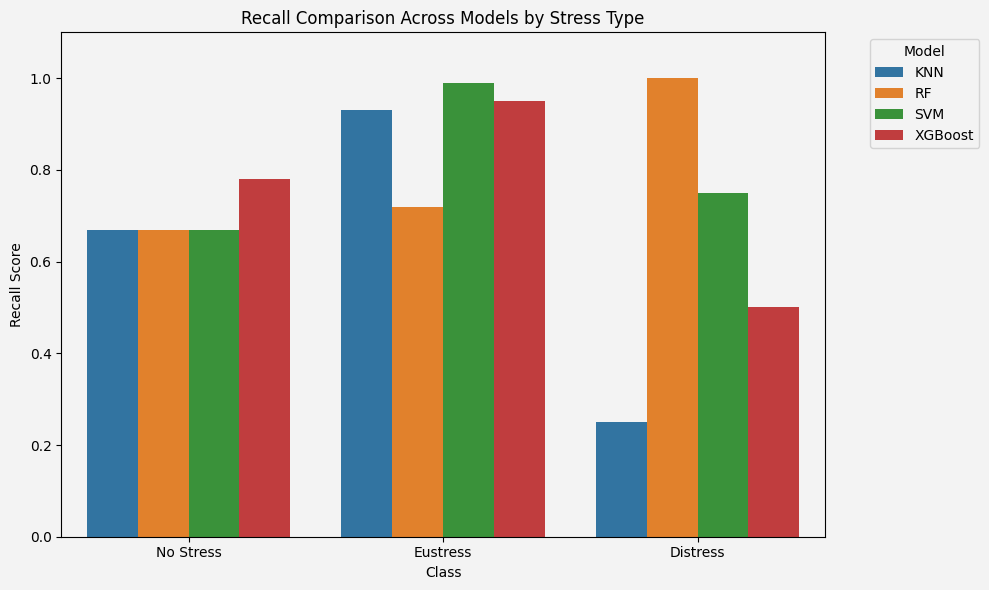

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the table above
data = {
    'Model': ['KNN']*3 + ['RF']*3 + ['SVM']*3 + ['XGBoost']*3,
    'Class': ['No Stress', 'Eustress', 'Distress']*4,
    'Recall': [0.67, 0.93, 0.25, 0.67, 0.72, 1.00, 0.67, 0.99, 0.75, 0.78, 0.95, 0.50]
}
df = pd.DataFrame(data)

# Plot recall per class across models
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Recall', hue='Model', data=df)
plt.title('Recall Comparison Across Models by Stress Type')
plt.ylabel('Recall Score')
plt.ylim(0, 1.1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

SVM has the best overall balance—high recall for all classes, especially Distress.

XGBoost improves minority class recall using sample_weight, but still trails SVM.

Random Forest is aggressive in catching Distress, but misclassifies others.

KNN is biased toward Eustress, with weak performance on Distress.

In [ ]:
# Convert multiclass labels to binary
y_train_binary = (y_train == 2).astype(int)
y_test_binary = (y_test == 2).astype(int)

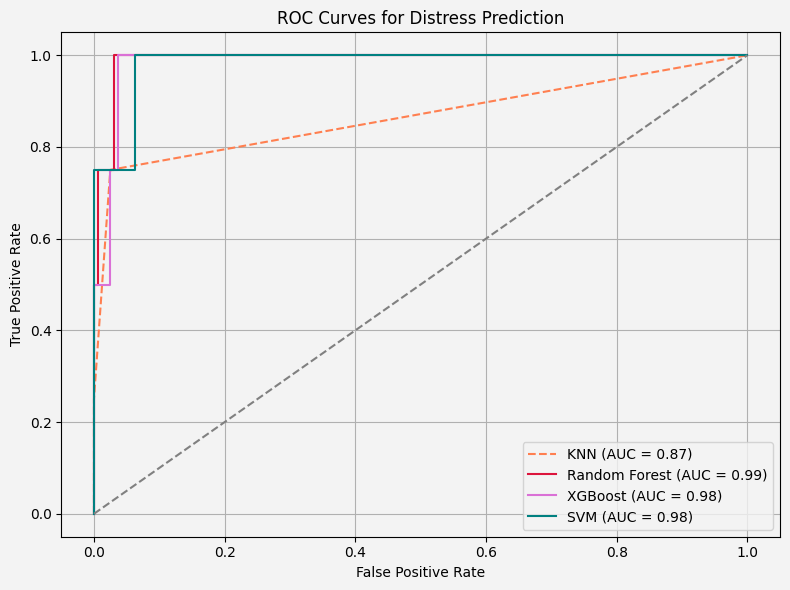

In [ ]:
# Get predicted probabilities for index 2 (Distress class)
y_knn = knn_gridcv.best_estimator_.predict_proba(X_test)[:, 2]
y_rf  = rf_gridcv.best_estimator_.predict_proba(X_test)[:, 2]
y_xgb  = xgb_gridcv.best_estimator_.predict_proba(X_test)[:, 2]
y_svm  = svm_gridcv.best_estimator_.predict_proba(X_test)[:, 2]

# Calculate ROC curves
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_knn)
fpr_rf, tpr_rf, _   = roc_curve(y_test_binary, y_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_binary, y_xgb)
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_svm)

# Calculate AUC scores
auc_knn = roc_auc_score(y_test_binary, y_knn)
auc_rf  = roc_auc_score(y_test_binary, y_rf)
auc_xgb = roc_auc_score(y_test_binary, y_xgb)
auc_svm = roc_auc_score(y_test_binary, y_svm)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', linestyle='--', color='coral')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='-', color='crimson')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', linestyle='-', color='orchid')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', linestyle='-', color='teal')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Distress Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

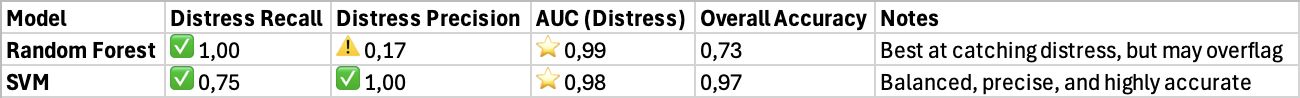

## SVM

In [ ]:
# Extract predicted probabilities for Distress
y_train_proba = svm_gridcv.best_estimator_.predict_proba(X_train)[:, 2]
y_test_proba = svm_gridcv.best_estimator_.predict_proba(X_test)[:, 2]

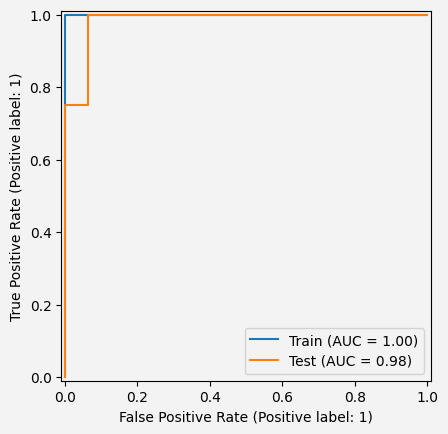

In [ ]:
# Plot ROC curves
roc_display = RocCurveDisplay.from_predictions(
    y_train_binary,
    y_train_proba,
    name='Train',
)

RocCurveDisplay.from_predictions(
    y_test_binary,
    y_test_proba,
    name='Test',
    ax=roc_display.ax_,
)

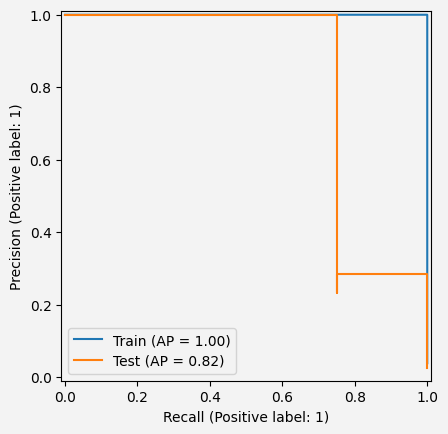

In [ ]:
# Plot Precision-Recall curves
pr_display = PrecisionRecallDisplay.from_predictions(
    y_train_binary,
    y_train_proba,
    name='Train',
)

PrecisionRecallDisplay.from_predictions(
    y_test_binary,
    y_test_proba,
    name='Test',
    ax=pr_display.ax_,
)

## Shapley Additive Value Feature Importance

In [ ]:
explainer = shap.KernelExplainer(
  svm_gridcv.best_estimator_.predict_proba,
  X_train,
  feature_perturbation='interventional',
)
explanation = explainer(X_train)
shap_values = explainer.shap_values(X_train)

  0%|          | 0/652 [00:00<?, ?it/s]

  0%|          | 0/652 [00:00<?, ?it/s]

### Feature importance

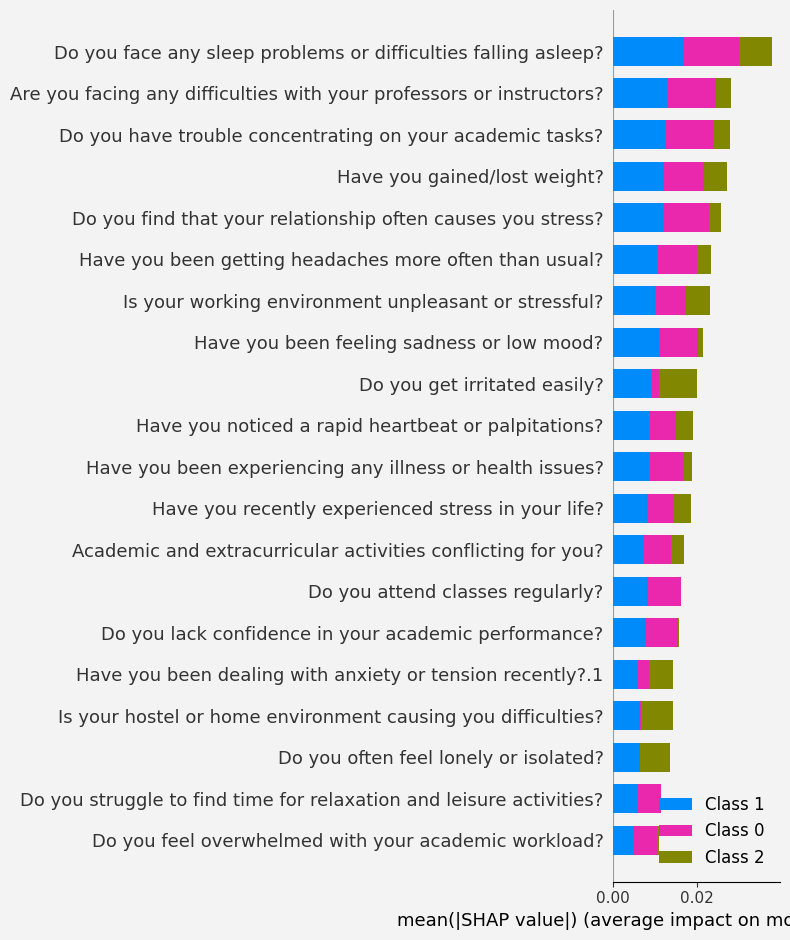

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

Top Influential Features (High SHAP Values):
1. Sleep Problems: Most impactful overall—poor sleep is a strong signal for both distress and eustress.

2. Difficulty with Professors: Academic relationships matter; tension here heavily influences stress type.

3. Trouble Concentrating: Cognitive strain is a clear marker of stress, especially distress.

4. Weight Changes & Headaches: Physical symptoms are strong predictors—often overlooked but highly telling.

5. Relationship Stress & Sadness: Emotional and interpersonal factors are deeply tied to distress classification.


Blue (Class 0 – No Stress): Often linked to absence of negative symptoms.

Pink (Class 1 – Eustress): Motivational stress tied to challenge, not dysfunction.

Cyan (Class 2 – Distress): Dominated by emotional and physical strain.

## Save the model

In [ ]:
import joblib

model = svm_gridcv.best_estimator_

# Save the model to a file
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
model = joblib.load('best_model.pkl')
model

SVC(C=100, class_weight={0: 0.050613, 1: 0.911043, 2: 0.038344},
    decision_function_shape='ovo', kernel='linear', probability=True,
    random_state=42)

In [ ]:
# Save preprocessing tools
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
scaler = joblib.load('scaler.pkl')
scaler

MinMaxScaler()

In [ ]:
# save df and train/test data
df.to_csv('df.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Recommendation

**Deploy SVM for Distress Screening**

Use Support Vector Machine (SVM) as the primary model for early detection of students at risk of distress, given its strong performance in handling imbalanced data.

**Targeted Support Programs**

1. Counseling for emotional and relationship stress: Provide counseling focused on managing emotional and relationship-related stressors.

2. Workshops on sleep hygiene and concentration techniques: Organize sessions on sleep hygiene, stress management, and concentration techniques to promote healthier study habits.

3. Faculty training to improve student-professor dynamics: Train faculty members to foster supportive student-professor interactions and improve academic dynamics.

In [ ]:
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
# import shap
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

# Load trained model (SVM)
model = joblib.load('data/best_model.pkl')

# Load SHAP explainer
# X_train = pd.read_csv("data/X_train.csv")
# feature_data_sample = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
# explainer = shap.Explainer(model.predict_proba, feature_data_sample)  # Use KernelExplainer if needed

# Define input questions
questions = [
    "Have you recently experienced stress in your life?",
    "Do you face any sleep problems or difficulties falling asleep?",
    "Are you facing any difficulties with your professors or instructors?",
    "Do you have trouble concentrating on your academic tasks?",
    "Have you gained/lost weight?",
    "Do you find that your relationship often causes you stress?",
    "Have you been getting headaches more often than usual?",
    "Is your working environment unpleasant or stressful?",
    "Have you been feeling sadness or low mood?",
    "Do you get irritated easily?",
    "Have you noticed a rapid heartbeat or palpitations?",
    "Have you been experiencing any illness or health issues?",
    "Academic and extracurricular activities conflicting for you?",
    "Do you attend classes regularly?",
    "Do you lack confidence in your academic performance?",
    "Have you been dealing with anxiety or tension recently?",
    "Is your hostel or home environment causing you difficulties?",
    "Do you often feel lonely or isolated?",
    "Do you struggle to find time for relaxation and leisure activities?",
    "Do you feel overwhelmed with your academic workload?",
    "Are you in competition with your peers, and does it affect you?",
    "Do you lack confidence in your choice of academic subjects?"
]

# Streamlit UI
st.title("🎓 Student Stress Prediction Dashboard")
st.write(
    """Created by Intan Nur Robi Annisa – student of Data Science and Data Analyst Bootcamp at Dibimbing.
    [LinkedIn Profile](https://www.linkedin.com/in/intannurrobiannisa)"""
)

st.subheader("Predict Your Stress Type 😌😰😖")
st.write("Input your responses below to see your predicted stress type and personalized recommendations.")
st.markdown("All responses are on a five-point Likert scale, ranging from 1:‘Not at all’ to 5:‘Extremely’.")

# Collect user input
user_input = []

gender = st.selectbox("Select your Gender:", ["Male", "Female"])
gender_encoded = 0 if gender == "Male" else 1
user_input.append(gender_encoded)

age = st.number_input("Enter your Age:", min_value=10, max_value=100, value=20)
user_input.append(age)

for q in questions:
    response = st.slider(q, 1, 5, 3)
    user_input.append(response)

# Convert to DataFrame
input_df = pd.DataFrame([user_input], columns=['Gender', 'Age'] + questions)
input_df.rename(columns={
    'Have you been dealing with anxiety or tension recently?': 'Have you been dealing with anxiety or tension recently?.1'
}, inplace=True)
new_order = [
    "Gender",
    'Age',
    "Have you recently experienced stress in your life?",
    "Have you noticed a rapid heartbeat or palpitations?",
    "Do you face any sleep problems or difficulties falling asleep?",
    "Have you been dealing with anxiety or tension recently?.1",
    "Have you been getting headaches more often than usual?",
    "Do you get irritated easily?",
    "Do you have trouble concentrating on your academic tasks?",
    "Have you been feeling sadness or low mood?",
    "Have you been experiencing any illness or health issues?",
    "Do you often feel lonely or isolated?",
    "Do you feel overwhelmed with your academic workload?",
    "Are you in competition with your peers, and does it affect you?",
    "Do you find that your relationship often causes you stress?",
    "Are you facing any difficulties with your professors or instructors?",
    "Is your working environment unpleasant or stressful?",
    "Do you struggle to find time for relaxation and leisure activities?",
    "Is your hostel or home environment causing you difficulties?",
    "Do you lack confidence in your academic performance?",
    "Do you lack confidence in your choice of academic subjects?",
    "Academic and extracurricular activities conflicting for you?",
    "Do you attend classes regularly?",
    "Have you gained/lost weight?"]
input_df = input_df[new_order]

# # Display input summary
# st.subheader("📋 Your Input Summary")
# st.dataframe(input_df)

# Scale if needed
scaler = joblib.load('data/scaler.pkl')
input_df['Age_Scaled'] = scaler.transform(input_df[['Age']])
input_df = input_df.drop(columns='Age')

# Wait for user to click before predicting
if st.button("Predict Stress Level"):
    # Predict
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0]

    # Map prediction to label
    stress_map = {0: "No Stress", 1: "Eustress", 2: "Distress"}
    st.subheader(f"🧠 Predicted Stress Type: **{stress_map[prediction]}**")

    # Show probabilities
    st.write("Prediction Confidence:")
    st.bar_chart(pd.Series(proba, index=[stress_map[i] for i in range(3)]))

    # SHAP explanation
    # st.subheader("🔍 Top Contributing Factors")
    # shap_values = explainer(input_df)
    # shap.plots.bar(shap_values[0], show=False)
    # st.pyplot(plt.gcf())
    # plt.clf()

    # Tailored recommendations
    st.subheader("🎯 Recommended Interventions")
    if prediction == 2:
        st.markdown("- Connect with a counselor or mental health professional")
        st.markdown("- Prioritize sleep and relaxation routines")
        st.markdown("- Seek academic support for workload management")
    elif prediction == 1:
        st.markdown("- Maintain healthy stress levels through time management")
        st.markdown("- Use stress as motivation—keep tracking your goals")
    else:
        st.markdown("- Keep up the good habits!")
        st.markdown("- Stay socially connected and monitor for any changes")

Overwriting app.py


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦
up to date, audited 23 packages in 1s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠦

In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.83.228.79
⠙your url is: https://loud-spoons-change.loca.lt
